# **### Emotion Label Detection On GoEmotion Simplified Dataset**

In [ ]:
pip install datasets #install datasets for loading GoEmotion Dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 8.4 MB/s eta 0:00:00


# Loading the data

In [ ]:
#Importing necessary Libraries
import pandas as pd
import torchvision
from datasets import load_dataset
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns", None)

go_emotion_simplified = load_dataset('go_emotions')#loading dataset GoEmotion
# go_emotion_simplified_train = pd.DataFrame(go_emotion_simplified['train'])   ## While execution took more time
go_emotion_simplified_train = go_emotion_simplified['train'].to_pandas() ## Lesser execution time
go_emotion_simplified_validation = go_emotion_simplified['validation'].to_pandas()
go_emotion_simplified_test = go_emotion_simplified['test'].to_pandas()

go_emotion_simplified_all = pd.concat([go_emotion_simplified_train, go_emotion_simplified_validation , go_emotion_simplified_test], ignore_index=True)
# Number of labels assigned to text
go_emotion_simplified_all['labels_count'] = go_emotion_simplified_all['labels'].apply(lambda x: len(x))
# Get the labels name

text_labels = """ 0: admiration
        1: amusement
        2: anger
        3: annoyance
        4: approval
        5: caring
        6: confusion
        7: curiosity
        8: desire
        9: disappointment
        10: disapproval
        11: disgust
        12: embarrassment
        13: excitement
        14: fear
        15: gratitude
        16: grief
        17: joy
        18: love
        19: nervousness
        20: optimism
        21: pride
        22: realization
        23: relief
        24: remorse
        25: sadness 
        26: surprise
        27: neutral"""

labels_dict = dict()

# labels_dict[int(kval.split(':')[0].strip())] = kval.split(':')[-1].strip()

for f in [kval for kval in [kv for kv in text_labels.split("\n")]]:
    labels_dict[int(f.split(':')[0].strip())] = f.split(':')[-1].strip()

for class_name in labels_dict:
    go_emotion_simplified_all[labels_dict[class_name]] = go_emotion_simplified_all['labels'].apply(lambda x: 1 if class_name in x else 0) # Since we have numpy arrays in labels column



go_emotion_simplified_all.head(5)



Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

Dataset go_emotions downloaded and prepared to /root/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

,text,labels,id,labels_count,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,My favourite food is anything I didn't have to...,[27],eebbqej,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,To make her feel threatened,[14],ed7ypvh,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Dirty Southern Wankers,[3],ed0bdzj,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Merging 27 emotions into 13 emotions

In [ ]:
# merge columns to create new categories
go_emotion_simplified_all['happiness'] = go_emotion_simplified_all['joy'] + go_emotion_simplified_all['amusement']
go_emotion_simplified_all['sadness'] = go_emotion_simplified_all['grief'] + go_emotion_simplified_all['sadness']
go_emotion_simplified_all['fear'] = go_emotion_simplified_all['fear'] + go_emotion_simplified_all['confusion'] +go_emotion_simplified_all['nervousness']
go_emotion_simplified_all['surprise'] = go_emotion_simplified_all['curiosity'] + go_emotion_simplified_all['surprise']
go_emotion_simplified_all['anger'] = go_emotion_simplified_all['anger'] + go_emotion_simplified_all['annoyance']
go_emotion_simplified_all['disgust'] = go_emotion_simplified_all['disappointment'] + go_emotion_simplified_all['disgust'] + go_emotion_simplified_all['disapproval']
go_emotion_simplified_all['anticipation'] = go_emotion_simplified_all['excitement'] + go_emotion_simplified_all['optimism']
go_emotion_simplified_all['realization'] = go_emotion_simplified_all['realization'] + go_emotion_simplified_all['pride']
go_emotion_simplified_all['desire'] = go_emotion_simplified_all['admiration'] + go_emotion_simplified_all['desire']
go_emotion_simplified_all['shame'] = go_emotion_simplified_all['embarrassment'] + go_emotion_simplified_all['remorse']
go_emotion_simplified_all['relief'] = go_emotion_simplified_all['relief'] + go_emotion_simplified_all['gratitude']
go_emotion_simplified_all['love'] = go_emotion_simplified_all['love'] + go_emotion_simplified_all['caring']


# keep desired columns and drop original columns
go_emotion_simplified_all = go_emotion_simplified_all[['text', 'happiness', 'sadness', 'fear', 'surprise', 'anger', 'disgust', 'approval','anticipation', 'realization','desire','shame','relief','love','neutral']]
Emotion_labels = go_emotion_simplified_all[['happiness', 'sadness', 'fear', 'surprise', 'anger', 'disgust', 'approval','anticipation', 'realization','desire','shame','relief','love','neutral']]
text = go_emotion_simplified_all[['text']]
# view the resulting dataframe
print(go_emotion_simplified_all.head(20))
print(Emotion_labels.head())


                                                 text  happiness  sadness  \
0   My favourite food is anything I didn't have to...          0        0   
1   Now if he does off himself, everyone will thin...          0        0   
2                      WHY THE FUCK IS BAYLESS ISOING          0        0   
3                         To make her feel threatened          0        0   
4                              Dirty Southern Wankers          0        0   
5   OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...          0        0   
6   Yes I heard abt the f bombs! That has to be wh...          0        0   
7   We need more boards and to create a bit more s...          0        0   
8   Damn youtube and outrage drama is super lucrat...          0        0   
9   It might be linked to the trust factor of your...          0        0   
10  Demographics? I don’t know anybody under 35 wh...          0        0   
11  Aww... she'll probably come around eventually,...          1        0   

### **Data Analysis And Visualisation**


## **Bar Chart** 

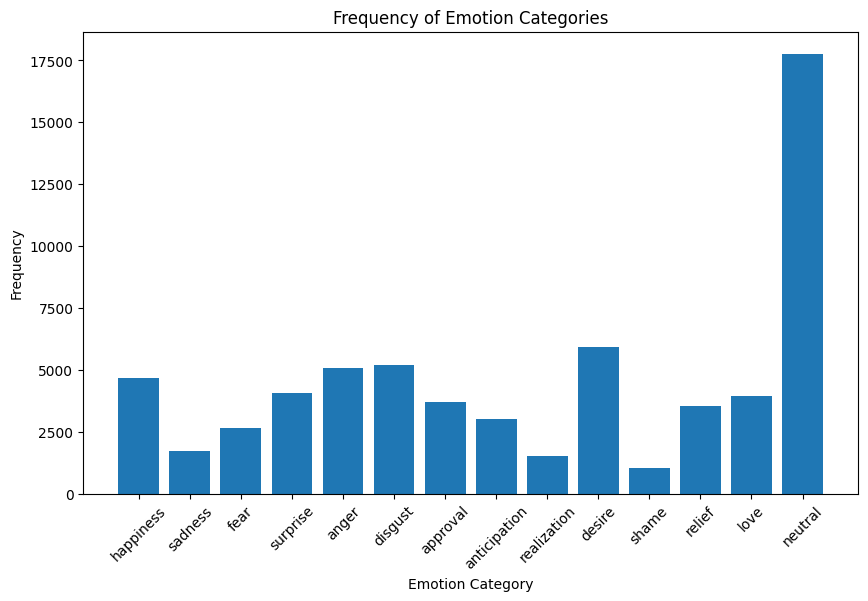

In [ ]:
import matplotlib.pyplot as plt



# Get the sum of each emotion column
emotion_counts = go_emotion_simplified_all.iloc[:, 1:].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.index, emotion_counts.values)

# Set the title and labels for the plot
plt.title('Frequency of Emotion Categories')
plt.xlabel('Emotion Category')
plt.ylabel('Frequency')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Show the plot
plt.show()

#Scatter Plot

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


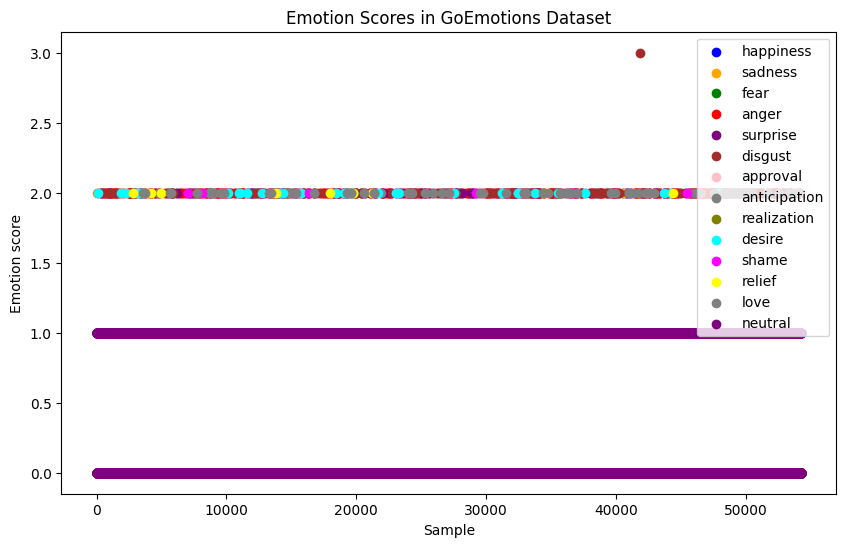

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

 # Define colors for each emotion
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'grey', 'purple']

# Extract the desired emotions
emotions = ['happiness', 'sadness', 'fear', 'anger', 'surprise', 'disgust', 'approval', 'anticipation', 'realization', 'desire', 'shame', 'relief', 'love','neutral']

# Create a scatter plot of the emotions
fig, ax = plt.subplots(figsize=(10, 6))
for i, emotion in enumerate(emotions):
    ax.scatter(go_emotion_simplified_all.index, go_emotion_simplified_all[emotion], label=emotion, color=colors[i])

ax.legend()
ax.set_xlabel('Sample')
ax.set_ylabel('Emotion score')
ax.set_title('Emotion Scores in GoEmotions Dataset')
plt.show()

#Pie Chart for emotions



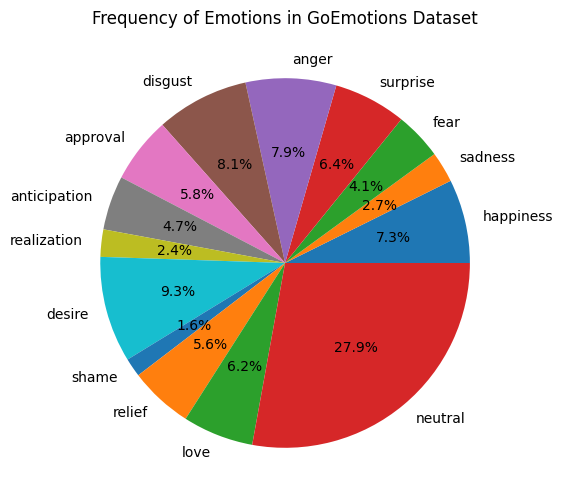

In [ ]:
# Create a pie chart of the overall emotion frequencies
plt.figure(figsize=(10, 6))
plt.pie(emotion_counts.values, labels=emotion_counts.index, autopct='%1.1f%%')
plt.title('Frequency of Emotions in GoEmotions Dataset')
plt.show()

### **#Word Cloud**


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


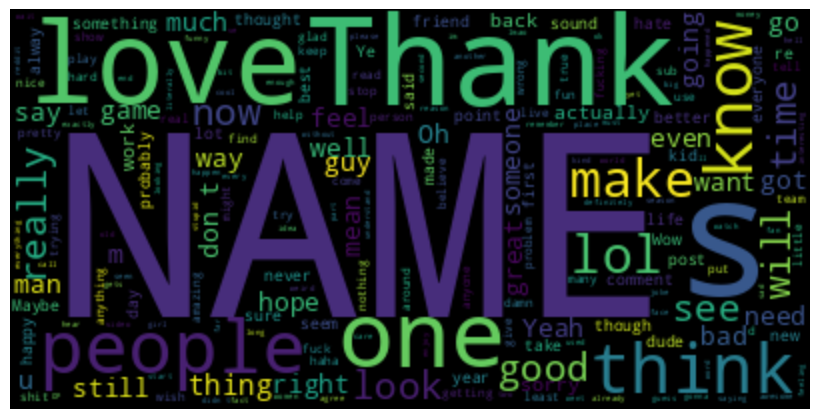

(54263,)


In [ ]:
!pip install wordcloud matplotlib pandas
text_data = go_emotion_simplified_all['text'].values
text = ' '.join(text_data)
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
print(text_data.shape)

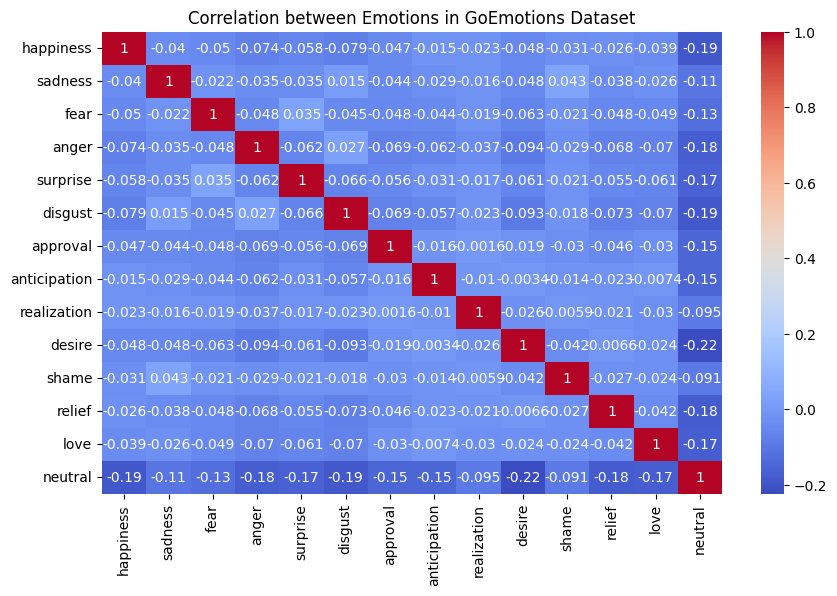

In [ ]:
# Create a heatmap of the correlation matrix for the emotions
corr = go_emotion_simplified_all[emotions].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Emotions in GoEmotions Dataset')
plt.show()

In [ ]:
#Length of the text 
go_emotion_simplified_all['text_len'] = go_emotion_simplified_all['text'].apply(lambda x: len(x.split()))
print(go_emotion_simplified_all['text_len'])

0        11
1        20
2         6
3         5
4         3
         ..
54258    12
54259     4
54260     3
54261    12
54262    19
Name: text_len, Length: 54263, dtype: int64


In [ ]:
# Split the text into individual words and count their frequency
word_counts = go_emotion_simplified_all['text'].str.split(expand=True).stack().value_counts()

print(word_counts)

the            20279
I              18623
to             15281
a              14930
and            10295
               ...  
trolls,            1
soaring!!          1
both/all           1
Baba               1
overdose...        1
Length: 65523, dtype: int64


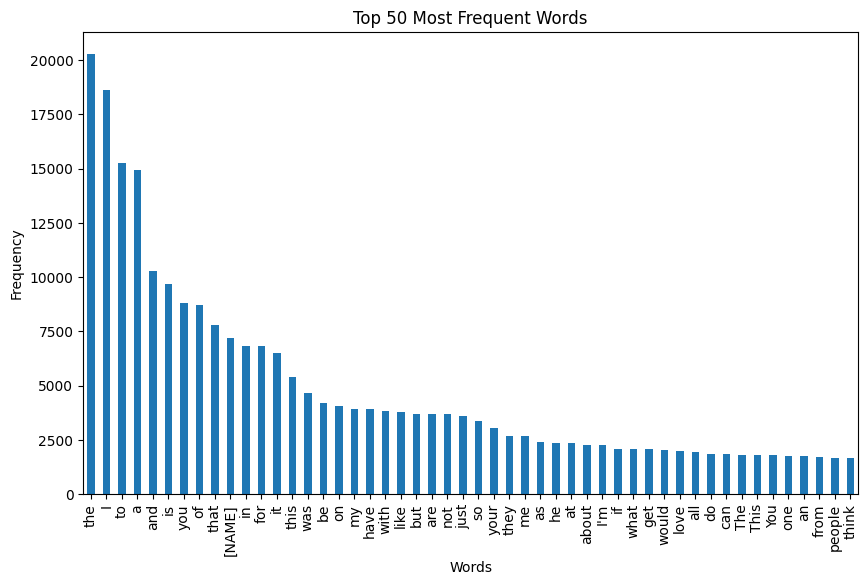

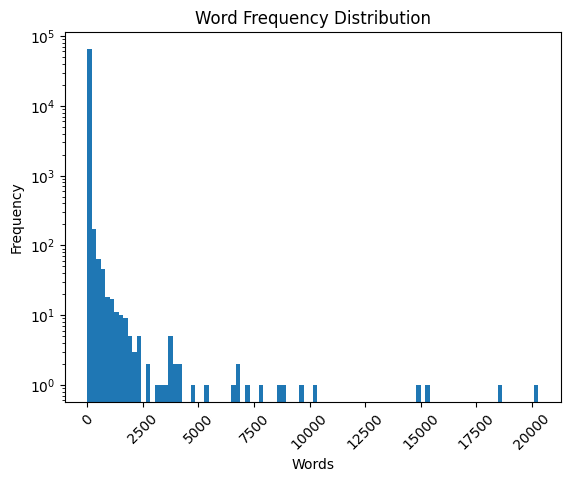

In [ ]:
# Plot the word frequency distribution as a bar chart
plt.figure(figsize=(10, 6))

# Set the number of words to display in the chart
top_n = 50

word_counts.head(top_n).plot(kind='bar')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()
plt.hist(word_counts.values, bins=100, log=True)
plt.title('Word Frequency Distribution')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Data Preprocessing**

In [ ]:
%pip install numpy sklearn nltk #installing necessary libraries

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=743c9dc636c19569cad70e056b5a780a5d8bd3d42098ab19ec72f2bf5a8420ec
  Stored in directory: /root/.cache/pip/wheels/d5/b2/a9/590d15767d34955f20a9a033e8db973b79cb5672d95790c0a9
Successfully built sklearn


In [ ]:
tokens = text.split()  # splitting based on spaces
vocab = sorted(set(tokens))  # sorting and removing duplicates by using set()
vocab  # just printing the vocab so we can look at it

['!',
 '!!',
 '!!!',
 '!!!!',
 '!!!!!',
 '!!!!!!',
 '!!:)',
 '!"',
 '!=',
 '!?',
 '!?!',
 '!CURSED!',
 '!Messageme',
 '!RemindMe',
 '!Remindme',
 '!delta',
 '!remindme',
 '"',
 '"**my**',
 '"*I',
 '"*New',
 '"*Why',
 '"*You',
 '"*[NAME],',
 '"*sent',
 '".',
 '"......shit."',
 '"...And',
 '"...after',
 '"...but',
 '"...for',
 '"...one',
 '"1-"',
 '"1000',
 '"12',
 '"14',
 '"1v1',
 '"3D"',
 '"7"',
 '">>")',
 '"A',
 '"AAAAAH',
 '"AHHH',
 '"AaaaaAAAaaaAAAhhh!"',
 '"Ab-Fab"',
 '"Acsended',
 '"Addison\'s',
 '"Allergy:',
 '"Amish',
 '"An',
 '"And',
 '"And,',
 '"Annihilation"',
 '"Anti',
 '"Anything',
 '"Are',
 '"Assault',
 '"At',
 '"Au-Bo"',
 '"BIG',
 '"BOTTOM',
 '"BRB"',
 '"Bad',
 '"Been',
 '"Being',
 '"Best',
 '"Better',
 '"Bingo!"',
 '"Boy',
 '"Brilliant,',
 '"Brussels',
 '"BuT',
 '"Build',
 '"But',
 '"Buy',
 '"By',
 '"CTR',
 '"Cammy"',
 '"Can',
 '"Chicken',
 '"Chicken"',
 '"Claim',
 '"Classic',
 '"Come',
 '"Consent',
 '"Corporate',
 '"Correlation',
 '"Could',
 '"Cute',
 '"DARWIN',
 '"Dadd

In [ ]:
#Length of tokens and vocab
tokens_len = len(tokens)
vocab_len = len(vocab)

print(f"Tokens: {tokens_len}")
print(f"Vocab: {vocab_len}")

Tokens: 695858
Vocab: 65523


In [ ]:
import re

def remove_special_chars(text):
    if isinstance(text, str):
        # Replace special characters with spaces
        text = re.sub(r'[^\w\s]', ' ', text)
        # Replace multiple spaces with a single space
        text = re.sub(r'\s+', ' ', text)
        # Remove leading and trailing spaces
        text = text.strip()
        return text
    else:
        return text


go_emotion_simplified_all['text'] = go_emotion_simplified_all['text'].apply(remove_special_chars)
print(go_emotion_simplified_all.head())


                                                text  happiness  sadness  \
0  My favourite food is anything I didn t have to...          0        0   
1  Now if he does off himself everyone will think...          0        0   
2                     WHY THE FUCK IS BAYLESS ISOING          0        0   
3                        To make her feel threatened          0        0   
4                             Dirty Southern Wankers          0        0   

   fear  surprise  anger  disgust  approval  anticipation  realization  \
0     0         0      0        0         0             0            0   
1     0         0      0        0         0             0            0   
2     0         0      1        0         0             0            0   
3     1         0      0        0         0             0            0   
4     0         0      1        0         0             0            0   

   desire  shame  relief  love  neutral  text_len  
0       0      0       0     0        1       

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


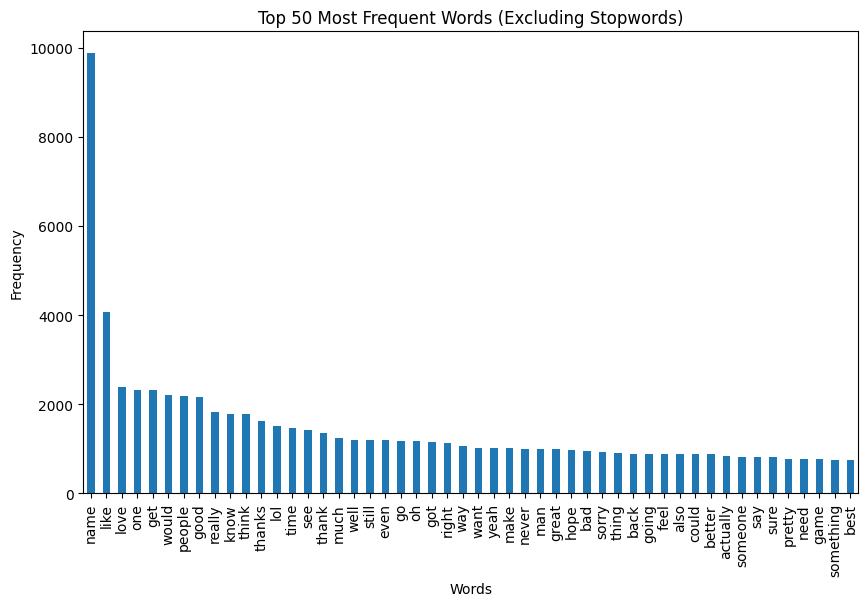

number of stopwords: 318
frozenset({'fifty', 'thereupon', 'already', 'now', 'into', 'hereafter', 'have', 'had', 'fire', 'from', 'move', 'fifteen', 'elsewhere', 'fill', 'go', 'should', 'system', 'being', 'via', 'ever', 'several', 'off', 'interest', 'through', 'either', 'do', 'against', 'bottom', 'she', 'was', 'moreover', 'with', 'them', 'yourselves', 'none', 'hereby', 'seem', 'thick', 're', 'three', 'whenever', 'its', 'our', 'other', 'whither', 'if', 'indeed', 'almost', 'whom', 'beyond', 'your', 'yours', 'such', 'five', 'beforehand', 'eleven', 'part', 'cry', 'me', 'on', 'hasnt', 'must', 'itself', 'six', 'another', 'again', 'whereby', 'seems', 'his', 'are', 'be', 'rather', 'they', 'will', 'more', 'might', 'for', 'never', 'up', 'nine', 'therein', 'over', 'cannot', 'keep', 'eg', 'top', 'amount', 'which', 'toward', 'above', 'latter', 'somewhere', 'wherein', 'would', 'give', 'ourselves', 'someone', 'un', 'empty', 'an', 'call', 'next', 'found', 'therefore', 'my', 'their', 'further', 'there', 

In [ ]:
# Count the frequency of each word after removing stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
word_counts = (go_emotion_simplified_all['text']
               .str.lower()
               .str.split()
               .apply(lambda x: [word for word in x if word not in stop_words])
               .explode()
               .value_counts())

# Set the number of words to display in the chart
top_n = 50

# Create a bar chart of the top N most frequent words
plt.figure(figsize=(10, 6))
word_counts.head(top_n).plot(kind='bar')
plt.title('Top {} Most Frequent Words (Excluding Stopwords)'.format(top_n))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words

print(f"number of stopwords: {len(sklearn_stop_words)}")
print(sklearn_stop_words)

In [ ]:
#Pos wordnet
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('wordnet')


def get_wordnet_pos(word):
    """Map the POS tag to the first character lemmatize() accepts."""

    try:  # download nltk's POS tagger if it doesn't exist
        nltk.data.find("taggers/averaged_perceptron_tagger")
    except LookupError:
        nltk.download("averaged_perceptron_tagger")
    tag = nltk.pos_tag([word])[0][1][0].upper()  # use ntlk's POS tagger on the word

    # now we need to convert from nltk to wordnet POS notations (for compatibility reasons)
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV
    }

    return tag_dict.get(tag, wordnet.NOUN)  # return and default to noun if not found



# Initialize the stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define a function to remove stopwords, stem and lemmatize the text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Stem and lemmatize the filtered tokens
    stem_tokens = [stemmer.stem(token) for token in filtered_tokens]
    lemma_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in filtered_tokens]
    # Join the stemmed and lemmatized tokens back into a sentence
    preprocessed_text = ' '.join(lemma_tokens)
    return preprocessed_text

# Apply the preprocess_text function to the text column of the dataframe
go_emotion_simplified_all['text'] = go_emotion_simplified_all['text'].apply(preprocess_text)

# Print the first 10 rows of the cleaned text column
print(go_emotion_simplified_all['text'][:10])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


0                         favourite food anything cook
1    everyone think he laugh screw people instead a...
2                                  fuck bayless isoing
3                                   make feel threaten
4                                dirty southern wanker
5    omg peyton good enough help u playoff dumbass ...
6    yes heard abt f bomb thanks reply hubby anxiou...
7                need board create bit space name good
8    damn youtube outrage drama super lucrative reddit
9                       might link trust factor friend
Name: text, dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the 13 emotion labels
emotions = ['happiness', 'sadness', 'fear', 'surprise', 'anger', 'disgust', 'approval',
            'anticipation', 'realization','desire','shame','relief','love','neutral']

# Create a label encoder object
le = LabelEncoder()

# Fit the encoder to the emotion labels
le.fit(emotions)

# Transform the emotion labels to numerical values
encoded_emotions = le.transform(emotions)

# Print the encoded emotion labels
print(encoded_emotions)

# Print the emotion labels and the corresponding encoded values
print("Emotion Labels:")
for label, encoded_value in zip(emotions, le.transform(emotions)):
    print(label, ":", encoded_value)

# Print the encoder itself
print("\nLabelEncoder:", le)

[ 6 11  5 13  0  4  2  1  9  3 12 10  7  8]
Emotion Labels:
happiness : 6
sadness : 11
fear : 5
surprise : 13
anger : 0
disgust : 4
approval : 2
anticipation : 1
realization : 9
desire : 3
shame : 12
relief : 10
love : 7
neutral : 8

LabelEncoder: LabelEncoder()


In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r"\w+|$[0-9.]+|\S+.>,<")
tokenizer.tokenize(text)

['My',
 'favourite',
 'food',
 'is',
 'anything',
 'I',
 'didn',
 't',
 'have',
 'to',
 'cook',
 'myself',
 'Now',
 'if',
 'he',
 'does',
 'off',
 'himself',
 'everyone',
 'will',
 'think',
 'hes',
 'having',
 'a',
 'laugh',
 'screwing',
 'with',
 'people',
 'instead',
 'of',
 'actually',
 'dead',
 'WHY',
 'THE',
 'FUCK',
 'IS',
 'BAYLESS',
 'ISOING',
 'To',
 'make',
 'her',
 'feel',
 'threatened',
 'Dirty',
 'Southern',
 'Wankers',
 'OmG',
 'pEyToN',
 'iSn',
 'T',
 'gOoD',
 'eNoUgH',
 'tO',
 'hElP',
 'uS',
 'iN',
 'tHe',
 'PlAyOfFs',
 'Dumbass',
 'Broncos',
 'fans',
 'circa',
 'December',
 '2015',
 'Yes',
 'I',
 'heard',
 'abt',
 'the',
 'f',
 'bombs',
 'That',
 'has',
 'to',
 'be',
 'why',
 'Thanks',
 'for',
 'your',
 'reply',
 'until',
 'then',
 'hubby',
 'and',
 'I',
 'will',
 'anxiously',
 'wait',
 'We',
 'need',
 'more',
 'boards',
 'and',
 'to',
 'create',
 'a',
 'bit',
 'more',
 'space',
 'for',
 'NAME',
 'Then',
 'we',
 'll',
 'be',
 'good',
 'Damn',
 'youtube',
 'and',
 'outr

In [ ]:
# create a copy of the dataframe
df_with_label = go_emotion_simplified_all.copy()

# create a new column 'Label' and set its values based on the max value in each row
df_with_label['label'] = df_with_label[['happiness', 'sadness', 'fear', 'surprise', 'anger', 'disgust', 'approval', 'anticipation', 'realization', 'desire', 'shame', 'relief', 'love', 'neutral']].apply(lambda x: x.idxmax(), axis=1)
# concatenate dataframes
go_emotion_simplified_all = pd.concat([go_emotion_simplified_all, df_with_label['label']], axis=1)
# print the resulting dataframe
print(go_emotion_simplified_all.head(20))


                                                 text  happiness  sadness  \
0                        favourite food anything cook          0        0   
1   everyone think he laugh screw people instead a...          0        0   
2                                 fuck bayless isoing          0        0   
3                                  make feel threaten          0        0   
4                               dirty southern wanker          0        0   
5   omg peyton good enough help u playoff dumbass ...          0        0   
6   yes heard abt f bomb thanks reply hubby anxiou...          0        0   
7               need board create bit space name good          0        0   
8   damn youtube outrage drama super lucrative reddit          0        0   
9                      might link trust factor friend          0        0   
10               demographic know anybody 35 cable tv          0        0   
11  aww probably come around eventually sure jealo...          1        0   

In [ ]:
go_emotion_simplified_updated = go_emotion_simplified_all.drop(go_emotion_simplified_all.columns[1:15], axis=1)#keeping only necessary columns in the dataframe
print(go_emotion_simplified_updated.head())


                                                text    label
0                       favourite food anything cook  neutral
1  everyone think he laugh screw people instead a...  neutral
2                                fuck bayless isoing    anger
3                                 make feel threaten     fear
4                              dirty southern wanker    anger


### CNN Model

In [ ]:
!pip install tensorflow #installing tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### CNN - Variation - 1 - Model Implementation

Epoch 1/10
543/543 [==============================] - 39s 45ms/step - loss: 2.0053 - accuracy: 0.4153 - val_loss: 1.6735 - val_accuracy: 0.5200
Epoch 2/10
543/543 [==============================] - 5s 10ms/step - loss: 1.5588 - accuracy: 0.5406 - val_loss: 1.5735 - val_accuracy: 0.5408
Epoch 3/10
543/543 [==============================] - 6s 11ms/step - loss: 1.3246 - accuracy: 0.5964 - val_loss: 1.6236 - val_accuracy: 0.5266
Epoch 4/10
543/543 [==============================] - 4s 7ms/step - loss: 1.0902 - accuracy: 0.6683 - val_loss: 1.7437 - val_accuracy: 0.5013
Epoch 5/10
543/543 [==============================] - 4s 8ms/step - loss: 0.8852 - accuracy: 0.7332 - val_loss: 1.9081 - val_accuracy: 0.4805
Epoch 6/10
543/543 [==============================] - 4s 8ms/step - loss: 0.7160 - accuracy: 0.7852 - val_loss: 2.1238 - val_accuracy: 0.4672
Epoch 7/10
543/543 [==============================] - 3s 6ms/step - loss: 0.5897 - accuracy: 0.8210 - val_loss: 2.3832 - val_accuracy: 0.4712
Ep

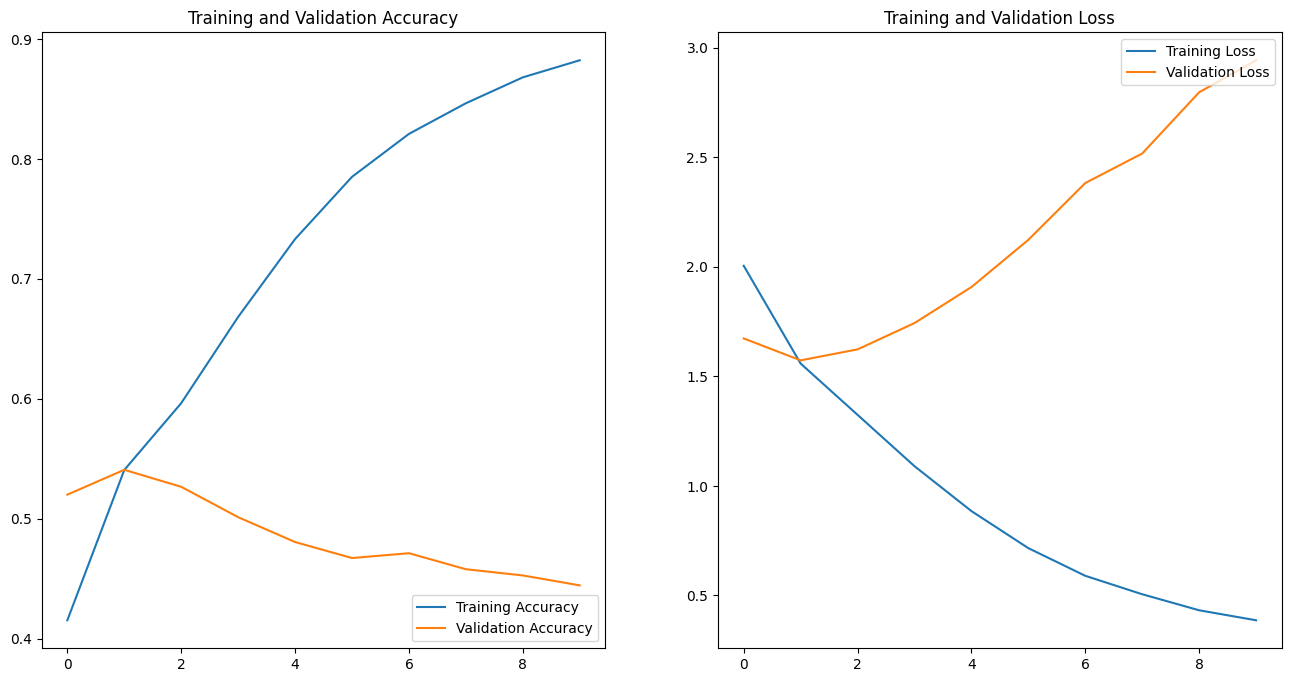

In [ ]:
#CNN - 45% - without early stopping
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalMaxPooling1D, Conv1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt



# Preprocessing
X = go_emotion_simplified_updated['text'].values
y = go_emotion_simplified_updated['label'].values

# Convert the labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

# Pad the sequences to a fixed length
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)

# Convert the emotion labels to one-hot encoded vectors
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

# Define the model architecture
input_shape = (maxlen,)
input_layer = Input(shape=input_shape)
embedding_layer = Embedding(input_dim=10000, output_dim=100)(input_layer)
conv1d_layer_1 = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
maxpooling1d_layer_1 = GlobalMaxPooling1D()(conv1d_layer_1)
dropout_layer_1 = Dropout(rate=0.2)(maxpooling1d_layer_1)
dense_layer_1 = Dense(units=64, activation='relu')(dropout_layer_1)
dropout_layer_2 = Dropout(rate=0.2)(dense_layer_1)
output_layer = Dense(units=num_classes, activation='softmax')(dropout_layer_2)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Calculate the evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()









## MisClassification Rate Calculation

In [ ]:
import numpy as np

# Define the confusion matrix
conf_matrix = np.array([[391, 10, 27, 28, 90, 28, 31, 17, 243, 2, 8, 12, 8, 34],
                        [10, 173, 18, 46, 9, 8, 26, 18, 97, 2, 11, 7, 4, 21],
                        [53, 21, 143, 67, 46, 28, 28, 20, 251, 6, 17, 1, 2, 35],
                        [22, 43, 54, 468, 30, 15, 51, 27, 134, 8, 48, 11, 3, 35],
                        [95, 14, 57, 40, 172, 37, 29, 11, 275, 5, 7, 33, 7, 56],
                        [31, 9, 28, 7, 24, 139, 12, 10, 163, 6, 4, 10, 4, 31],
                        [18, 36, 16, 38, 13, 3, 629, 15, 69, 6, 12, 1, 0, 12],
                        [25, 18, 36, 43, 24, 16, 28, 241, 89, 4, 2, 14, 1, 31],
                        [212, 87, 190, 159, 210, 123, 125, 70, 1725, 27, 16, 52, 6, 173],
                        [8, 4, 12, 16, 11, 11, 6, 2, 65, 23, 5, 3, 2, 16],
                        [9, 16, 16, 31, 8, 1, 28, 4, 20, 1, 386, 3, 3, 8],
                        [25, 11, 11, 10, 29, 9, 9, 8, 65, 2, 2, 133, 19, 13],
                        [20, 1, 4, 1, 8, 4, 5, 2, 17, 2, 1, 18, 45, 4],
                        [37, 26, 32, 47, 34, 26, 25, 9, 236, 11, 14, 10, 2, 171]])

# Calculate the misclassification rate for each class
misclass_rate = 1 - np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

print("Misclassification rate for each class:")
for i, rate in enumerate(misclass_rate):
    print(f"Class {i}: {rate:.2%}")



Misclassification rate for each class:
Class 0: 57.91%
Class 1: 61.56%
Class 2: 80.08%
Class 3: 50.68%
Class 4: 79.47%
Class 5: 70.92%
Class 6: 27.53%
Class 7: 57.87%
Class 8: 45.67%
Class 9: 87.50%
Class 10: 27.72%
Class 11: 61.56%
Class 12: 65.91%
Class 13: 74.85%


### CNN With Early Stopping

Epoch 1/10
543/543 [==============================] - 37s 65ms/step - loss: 2.0056 - accuracy: 0.4161 - val_loss: 1.6740 - val_accuracy: 0.5075
Epoch 2/10
543/543 [==============================] - 5s 10ms/step - loss: 1.5623 - accuracy: 0.5388 - val_loss: 1.5753 - val_accuracy: 0.5355
Epoch 3/10
543/543 [==============================] - 4s 8ms/step - loss: 1.3241 - accuracy: 0.5963 - val_loss: 1.6268 - val_accuracy: 0.5244
Epoch 4/10
543/543 [==============================] - 4s 7ms/step - loss: 1.1057 - accuracy: 0.6623 - val_loss: 1.7433 - val_accuracy: 0.5066
Epoch 5/10
543/543 [==============================] - 4s 7ms/step - loss: 0.9025 - accuracy: 0.7269 - val_loss: 1.9114 - val_accuracy: 0.4840
Epoch 5: early stopping
340/340 [==============================] - 1s 3ms/step - loss: 1.9158 - accuracy: 0.4910
Test loss: 1.915794849395752
Test accuracy: 0.49101629853248596
340/340 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support



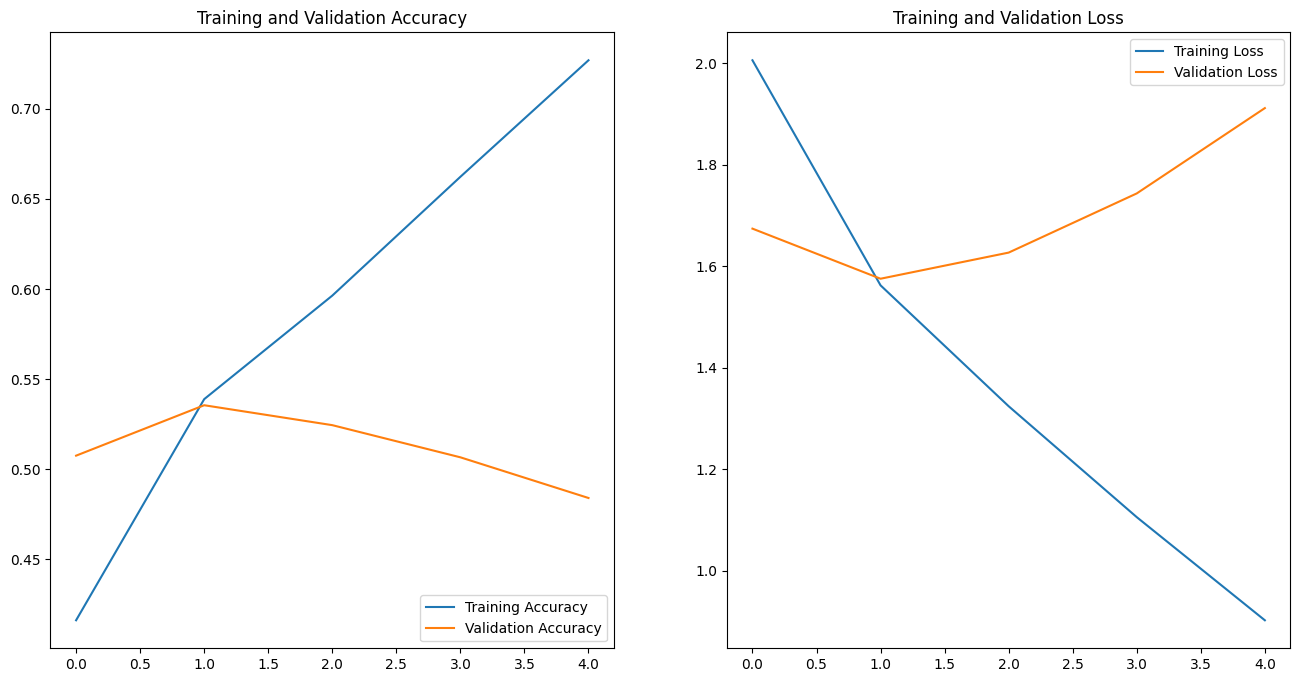

In [ ]:
#CNN  - 45% - 49.13% accuracy and 1.92% loss with early stopping
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalMaxPooling1D, Conv1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt



# Preprocessing
X = go_emotion_simplified_updated['text'].values
y = go_emotion_simplified_updated['label'].values

# Convert the labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

# Pad the sequences to a fixed length
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)

# Convert the emotion labels to one-hot encoded vectors
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

# Define the model architecture
input_shape = (maxlen,)
input_layer = Input(shape=input_shape)
embedding_layer = Embedding(input_dim=10000, output_dim=100)(input_layer)
conv1d_layer_1 = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
maxpooling1d_layer_1 = GlobalMaxPooling1D()(conv1d_layer_1)
dropout_layer_1 = Dropout(rate=0.2)(maxpooling1d_layer_1)
dense_layer_1 = Dense(units=64, activation='relu')(dropout_layer_1)
dropout_layer_2 = Dropout(rate=0.2)(dense_layer_1)
output_layer = Dense(units=num_classes, activation='softmax')(dropout_layer_2)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)


# Train the model
batch_size = 64
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks=[early_stop] )


# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)



# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Calculate the evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()










### CNN Variation 2 - Loss Function - KL Divergence Loss frunction from Categorical Cross Entropy Loss function

Epoch 1/10
543/543 [==============================] - 20s 33ms/step - loss: 1.9859 - accuracy: 0.4234 - val_loss: 1.6452 - val_accuracy: 0.5253
Epoch 2/10
543/543 [==============================] - 6s 11ms/step - loss: 1.5343 - accuracy: 0.5465 - val_loss: 1.5737 - val_accuracy: 0.5372
Epoch 3/10
543/543 [==============================] - 4s 7ms/step - loss: 1.3099 - accuracy: 0.6011 - val_loss: 1.6083 - val_accuracy: 0.5203
Epoch 4/10
543/543 [==============================] - 4s 7ms/step - loss: 1.0835 - accuracy: 0.6691 - val_loss: 1.7501 - val_accuracy: 0.5115
Epoch 5/10
543/543 [==============================] - 4s 7ms/step - loss: 0.8753 - accuracy: 0.7327 - val_loss: 1.8923 - val_accuracy: 0.4885
Epoch 5: early stopping
340/340 [==============================] - 1s 2ms/step - loss: 1.8917 - accuracy: 0.4961
Test loss: 1.8916624784469604
Test accuracy: 0.4960840344429016
340/340 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support



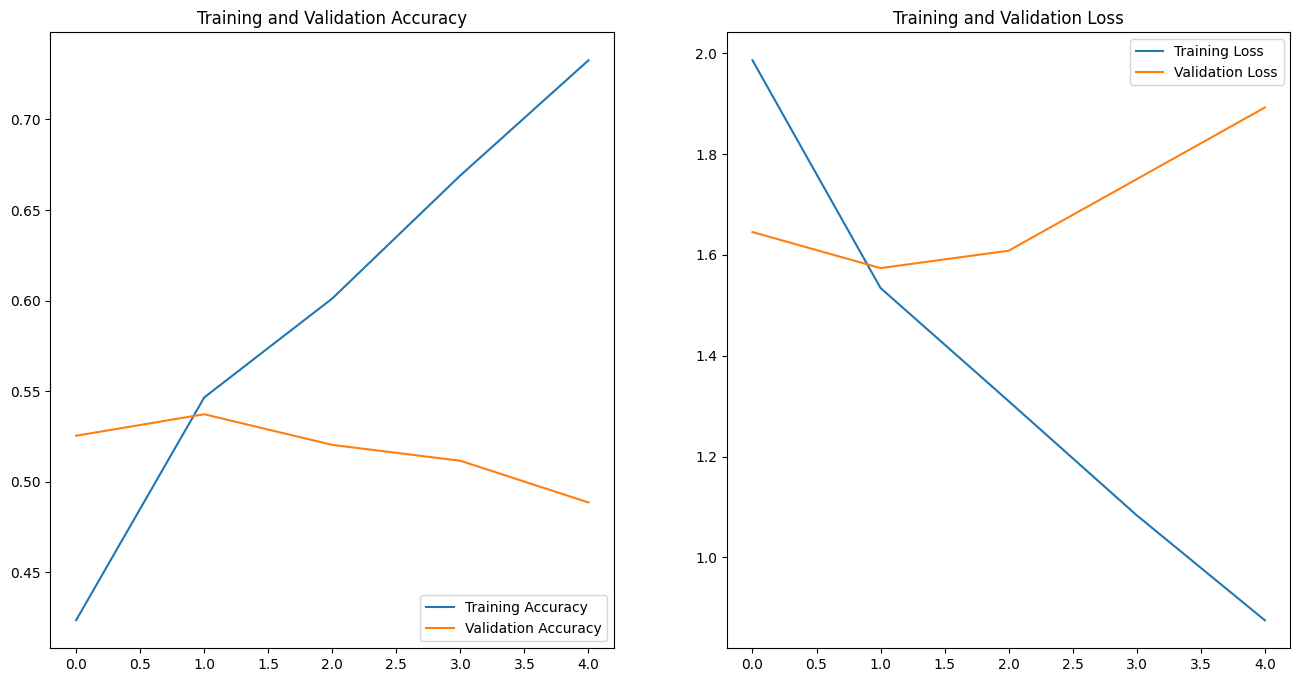

In [ ]:
#CNN - final - 45% - 49.42 with early stopping and changed loss function to KLDivergence loss function variation 2/1
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalMaxPooling1D, Conv1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt



# Preprocessing
X = go_emotion_simplified_updated['text'].values
y = go_emotion_simplified_updated['label'].values

# Convert the labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

# Pad the sequences to a fixed length
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)

# Convert the emotion labels to one-hot encoded vectors
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

# Define the model architecture
input_shape = (maxlen,)
input_layer = Input(shape=input_shape)
embedding_layer = Embedding(input_dim=10000, output_dim=100)(input_layer)
conv1d_layer_1 = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
maxpooling1d_layer_1 = GlobalMaxPooling1D()(conv1d_layer_1)
dropout_layer_1 = Dropout(rate=0.2)(maxpooling1d_layer_1)
dense_layer_1 = Dense(units=64, activation='relu')(dropout_layer_1)
dropout_layer_2 = Dropout(rate=0.2)(dense_layer_1)
output_layer = Dense(units=num_classes, activation='softmax')(dropout_layer_2)

model = Model(inputs=input_layer, outputs=output_layer)
#changing loss function to Kullback Leibler Divergence Loss function
model.compile(optimizer='adam', loss='kullback_leibler_divergence', metrics=['accuracy'])

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)


# Train the model
batch_size = 64
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks=[early_stop] )


# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)



# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Calculate the evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()










## CNN Variation 2 - KL DIvergence Loss function and Optimizer changed to Adamax optmizer from Adam optimizer

Epoch 1/10
543/543 [==============================] - 33s 40ms/step - loss: 2.2880 - accuracy: 0.3174 - val_loss: 2.0292 - val_accuracy: 0.4073
Epoch 2/10
543/543 [==============================] - 6s 11ms/step - loss: 1.9243 - accuracy: 0.4435 - val_loss: 1.8222 - val_accuracy: 0.4648
Epoch 3/10
543/543 [==============================] - 4s 8ms/step - loss: 1.7776 - accuracy: 0.4828 - val_loss: 1.7370 - val_accuracy: 0.4871
Epoch 4/10
543/543 [==============================] - 5s 8ms/step - loss: 1.6744 - accuracy: 0.5083 - val_loss: 1.6756 - val_accuracy: 0.5152
Epoch 5/10
543/543 [==============================] - 4s 7ms/step - loss: 1.5900 - accuracy: 0.5279 - val_loss: 1.6447 - val_accuracy: 0.5185
Epoch 6/10
543/543 [==============================] - 3s 6ms/step - loss: 1.5250 - accuracy: 0.5407 - val_loss: 1.6236 - val_accuracy: 0.5261
Epoch 7/10
543/543 [==============================] - 4s 7ms/step - loss: 1.4615 - accuracy: 0.5548 - val_loss: 1.6185 - val_accuracy: 0.5310
Epo

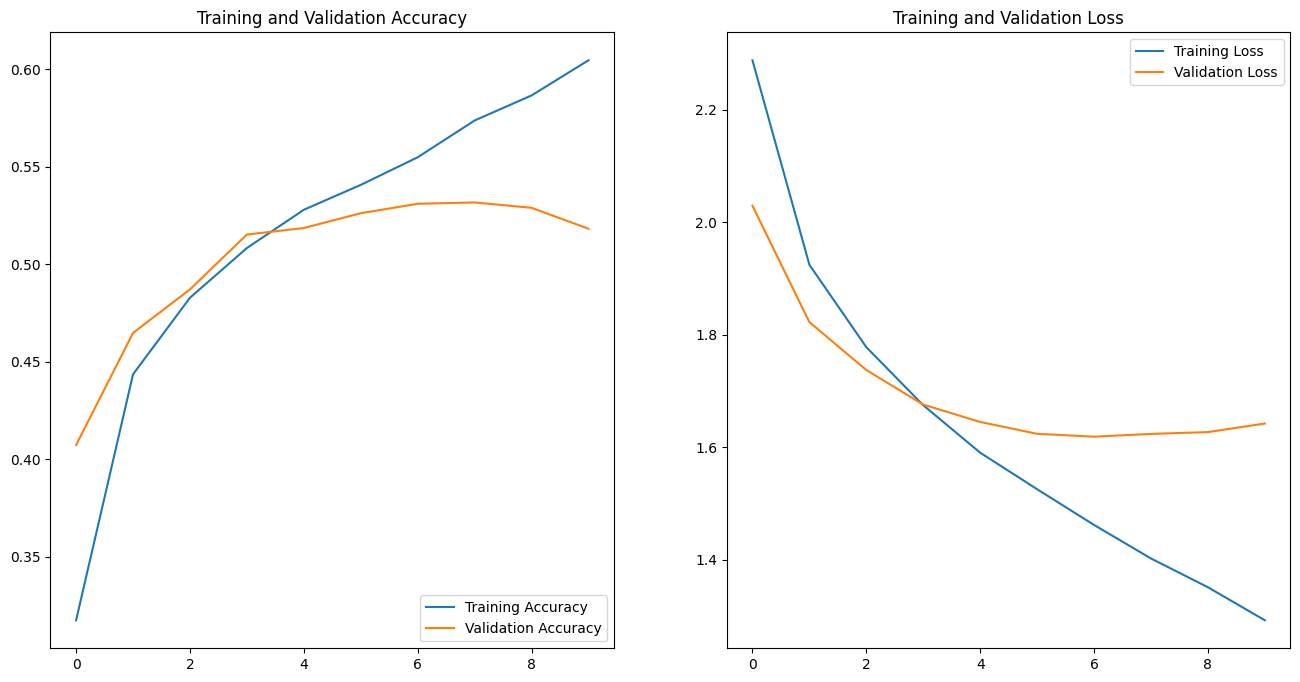

In [ ]:
#CNN - final - 45% - 49.42-49.42-53 with early stopping and changed loss function to KLDivergence loss function  and adamax optimizer from adam variation 2
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalMaxPooling1D, Conv1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt



# Preprocessing
X = go_emotion_simplified_updated['text'].values
y = go_emotion_simplified_updated['label'].values

# Convert the labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

# Pad the sequences to a fixed length
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)

# Convert the emotion labels to one-hot encoded vectors
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

# Define the model architecture
input_shape = (maxlen,)
input_layer = Input(shape=input_shape)
embedding_layer = Embedding(input_dim=10000, output_dim=100)(input_layer)
conv1d_layer_1 = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
maxpooling1d_layer_1 = GlobalMaxPooling1D()(conv1d_layer_1)
dropout_layer_1 = Dropout(rate=0.2)(maxpooling1d_layer_1)
dense_layer_1 = Dense(units=64, activation='relu')(dropout_layer_1)
dropout_layer_2 = Dropout(rate=0.2)(dense_layer_1)
output_layer = Dense(units=num_classes, activation='softmax')(dropout_layer_2)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adamax', loss='kullback_leibler_divergence', metrics=['accuracy'])

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)


# Train the model
batch_size = 64
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks=[early_stop] )


# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)



# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Calculate the evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()










MisClassification Rate Calculation

In [ ]:
import numpy as np

# Define the confusion matrix
conf_matrix = np.array([[456, 4, 7, 13, 71, 8, 16, 16, 289, 0, 15, 16, 6, 12],
                             [7, 201, 5, 38, 6, 3, 19, 13, 121, 0, 12, 0, 3, 22],
                             [29, 14, 105, 69, 31, 13, 29, 31, 365, 0, 17, 4, 1, 10],
                             [16, 24, 14, 534, 23, 8, 46, 37, 170, 0, 50, 8, 3, 16],
                             [82, 14, 20, 43, 204, 16, 23, 14, 371, 1, 4, 22, 8, 16],
                             [23, 6, 8, 15, 66, 118, 8, 10, 191, 0, 4, 9, 4, 16],
                             [14, 15, 7, 34, 4, 0, 674, 17, 75, 0, 16, 2, 0, 10],
                             [14, 17, 9, 32, 13, 5, 17, 338, 112, 0, 1, 5, 2, 7],
                             [164, 28, 78, 114, 179, 32, 88, 75, 2306, 0, 11, 33, 9, 58],
                             [11, 1, 11, 17, 10, 9, 6, 5, 84, 0, 7, 3, 9, 11],
                             [4, 12, 5, 29, 4, 0, 31, 5, 18, 0, 422, 1, 1, 2],
                             [15, 8, 4, 8, 41, 3, 9, 4, 83, 0, 3, 125, 39, 4],
                             [4, 2, 1, 1, 12, 2, 2, 1, 17, 0, 3, 20, 65, 2],
                             [22, 12, 8, 39, 31, 7, 22, 16, 307, 0, 16, 8, 7, 185]])

# Calculate the misclassification rate for each class
misclass_rate = 1 - np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

print("Misclassification rate for each class:")
for i, rate in enumerate(misclass_rate):
    print(f"Class {i}: {rate:.2%}")

Misclassification rate for each class:
Class 0: 50.91%
Class 1: 55.33%
Class 2: 85.38%
Class 3: 43.73%
Class 4: 75.66%
Class 5: 75.31%
Class 6: 22.35%
Class 7: 40.91%
Class 8: 27.37%
Class 9: 100.00%
Class 10: 20.97%
Class 11: 63.87%
Class 12: 50.76%
Class 13: 72.79%


# CNN Variation - 3 - Hyper parameter tuning - batch_size = 64 to 32, epochs = 10 to 20

Epoch 1/20
1086/1086 [==============================] - 24s 20ms/step - loss: 2.2358 - accuracy: 0.3426 - val_loss: 1.9683 - val_accuracy: 0.4293
Epoch 2/20
1086/1086 [==============================] - 8s 7ms/step - loss: 1.8846 - accuracy: 0.4606 - val_loss: 1.7935 - val_accuracy: 0.4741
Epoch 3/20
1086/1086 [==============================] - 8s 7ms/step - loss: 1.7402 - accuracy: 0.4941 - val_loss: 1.7044 - val_accuracy: 0.5062
Epoch 4/20
1086/1086 [==============================] - 8s 7ms/step - loss: 1.6322 - accuracy: 0.5200 - val_loss: 1.6618 - val_accuracy: 0.5197
Epoch 5/20
1086/1086 [==============================] - 8s 7ms/step - loss: 1.5512 - accuracy: 0.5367 - val_loss: 1.6395 - val_accuracy: 0.5223
Epoch 6/20
1086/1086 [==============================] - 6s 6ms/step - loss: 1.4802 - accuracy: 0.5524 - val_loss: 1.6243 - val_accuracy: 0.5245
Epoch 7/20
1086/1086 [==============================] - 7s 7ms/step - loss: 1.4150 - accuracy: 0.5727 - val_loss: 1.6207 - val_accurac

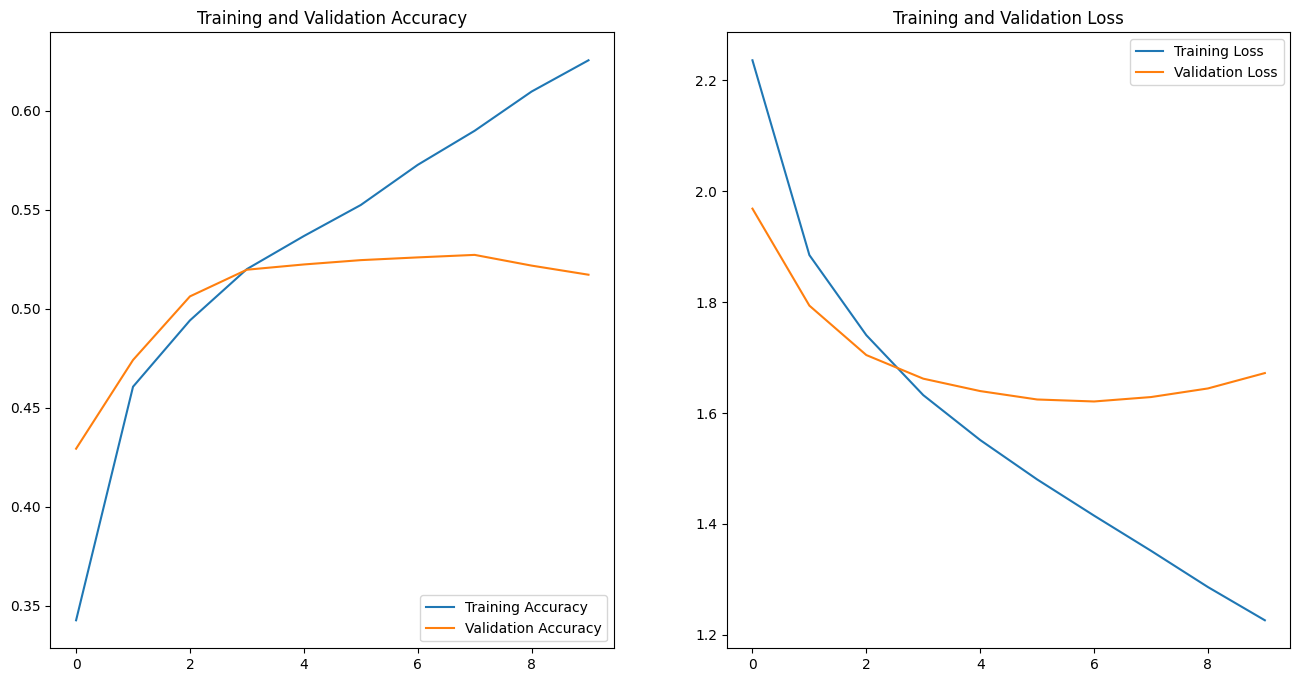

In [ ]:
#CNN - final - 45% - 49.42-49.42-54 with early stopping and changed loss function to KLDivergence loss function  and adamax optimizer from adam variation 2
#Variation 3 - hyper parameter tuning - batch_size = 64 to 32, epochs = 10 to 20 - 53% accuracy - 1.65% test loss

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalMaxPooling1D, Conv1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt



# Preprocessing
X = go_emotion_simplified_updated['text'].values
y = go_emotion_simplified_updated['label'].values

# Convert the labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

# Pad the sequences to a fixed length
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)

# Convert the emotion labels to one-hot encoded vectors
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)


# Define the model architecture
input_shape = (maxlen,)
input_layer = Input(shape=input_shape)
embedding_layer = Embedding(input_dim=10000, output_dim=100)(input_layer)
conv1d_layer_1 = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
maxpooling1d_layer_1 = GlobalMaxPooling1D()(conv1d_layer_1)
dropout_layer_1 = Dropout(rate=0.2)(maxpooling1d_layer_1)
dense_layer_1 = Dense(units=64, activation='relu')(dropout_layer_1)
dropout_layer_2 = Dropout(rate=0.2)(dense_layer_1)
output_layer = Dense(units=num_classes, activation='softmax')(dropout_layer_2)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adamax', loss='kullback_leibler_divergence', metrics=['accuracy'])

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Train the model
batch_size = 32 # Batch size changed 
epochs = 20 #epoch changed
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), callbacks=[early_stop])



# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)



# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Calculate the evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()










In [ ]:
import numpy as np

# Define the confusion matrix
conf_matrix = np.array([[ 423,5,16,11,74,15,22,18,296,3,17,9,7,13],
 [   6,194,10,37,8,4,25,14,107,0,13,3,2,27],
 [  33,18,124,70,28,14,24,30,338,0,18,4,1,16],
 [  17,23,28,529,7,8,47,38,176,5,49,5,1,16],
 [  79,14,31,32,193,10,31,14,381,5,5,16,7,20],
 [  37,5,13,10,28,136,12,5,197,1,4,6,4,20],
 [  13,15,7,34,4,2,682,17,64,1,14,2,0,13],
 [  15,19,9,31,13,3,22,331,110,0,1,8,2,8],
 [ 190,31,97,138,125,37,110,69,2255,5,10,23,8,77],
 [  11,2,8,16,7,5,6,4,85,17,9,4,2,8],
 [   2,11,2,33,5,0,27,4,20,2,420,2,1,5],
 [  13,7,3,9,31,3,9,5,89,0,4,135,33,5],
 [   6,1,3,1,18,0,3,2,18,0,3,17,59,1],
 [  28,12,13,39,19,5,25,10,304,4,14,8,5,194]])

# Calculate the misclassification rate for each class
misclass_rate = 1 - np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

print("Misclassification rate for each class:")
for i, rate in enumerate(misclass_rate):
    print(f"Class {i}: {rate:.2%}")

Misclassification rate for each class:
Class 0: 54.47%
Class 1: 56.89%
Class 2: 82.73%
Class 3: 44.26%
Class 4: 76.97%
Class 5: 71.55%
Class 6: 21.43%
Class 7: 42.13%
Class 8: 28.98%
Class 9: 90.76%
Class 10: 21.35%
Class 11: 60.98%
Class 12: 55.30%
Class 13: 71.47%


# CNN - Variation 4 - Without One hot Encoding

Epoch 1/10
543/543 [==============================] - 19s 32ms/step - loss: 33.9873 - accuracy: 0.1395 - val_loss: 33.9637 - val_accuracy: 0.2927
Epoch 2/10
543/543 [==============================] - 4s 8ms/step - loss: 33.9871 - accuracy: 0.1501 - val_loss: 33.9637 - val_accuracy: 0.0873
Epoch 3/10
543/543 [==============================] - 5s 9ms/step - loss: 33.9870 - accuracy: 0.0905 - val_loss: 33.9637 - val_accuracy: 0.0873
Epoch 4/10
543/543 [==============================] - 4s 7ms/step - loss: 33.9870 - accuracy: 0.0984 - val_loss: 33.9637 - val_accuracy: 0.0873
Epoch 4: early stopping
340/340 [==============================] - 1s 2ms/step - loss: 33.7842 - accuracy: 0.0874
Test loss: 33.78420639038086
Test accuracy: 0.08744125813245773
340/340 [==============================] - 1s 2ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       929
           1       0.00      0.00      0.00       450
           2       0.00      0.00      0.00       718
           3       0.09      1.00      0.16       949
           4       0.00      0.00      0.00       838
           5       0.00      0.00      0.00       478
           6       0.00      0.00      0.00       868
           7       0.00      0.00      0.00       572
           8       0.00      0.00      0.00      3175
           9       0.00      0.00      0.00       184
          10       0.00      0.00      0.00       534
          11       0.00      0.00      0.00       346
          12       0.00      0.00      0.00       132
          13       0.00      0.00      0.00       680

    accuracy                           0.09     10853
   macro avg       0.01      0.07      0.01     10853
weighted avg       0.01      0.09      0.01     10853

[[   0    0    0  929    

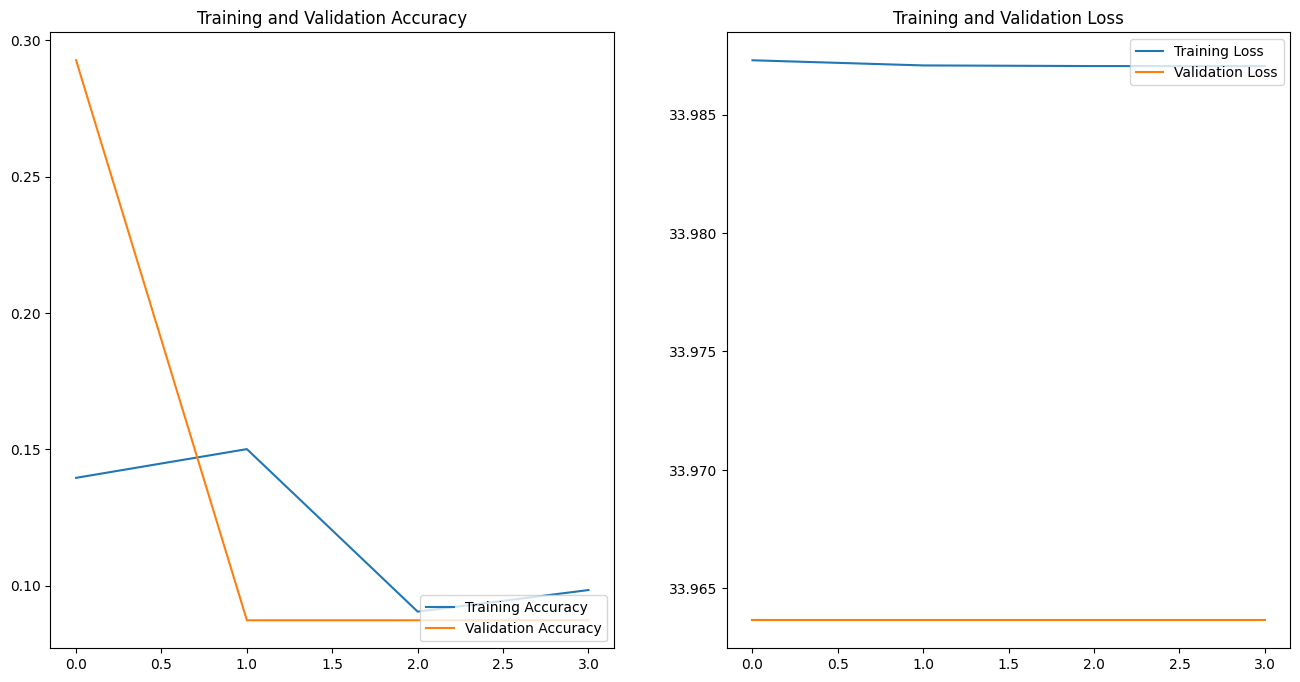

In [ ]:
#CNN - final - 45% - 49.42-49.42-54 with early stopping and changed loss function to KLDivergence loss function  and adamax optimizer from adam variation 2
#Variation 2 - hyper parameter tuning - batch_size = 64 to 32, epochs = 10 to 20 - 53% accuracy - 1.65% test loss
#Variation - 3Text featurisation - without one hot encoding accuracy -3.18%, loss - 33%
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalMaxPooling1D, Conv1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Preprocessing
X = go_emotion_simplified_updated['text'].values
y = go_emotion_simplified_updated['label'].values

# Convert the labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

# Pad the sequences to a fixed length
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)

# Define the model architecture
input_shape = (maxlen,)
input_layer = Input(shape=input_shape)
embedding_layer = Embedding(input_dim=10000, output_dim=100)(input_layer)
conv1d_layer_1 = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
maxpooling1d_layer_1 = GlobalMaxPooling1D()(conv1d_layer_1)
dropout_layer_1 = Dropout(rate=0.2)(maxpooling1d_layer_1)
dense_layer_1 = Dense(units=64, activation='relu')(dropout_layer_1)
dropout_layer_2 = Dropout(rate=0.2)(dense_layer_1)
output_layer = Dense(units=num_classes, activation='softmax')(dropout_layer_2)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adamax', loss='kullback_leibler_divergence', metrics=['accuracy'])

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)


# Train the model
batch_size = 64
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks=[early_stop] )


# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)



# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = y_test.astype(int)

# Calculate the evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()










# CNN Variation - 5 - Change train validation test split into 70/30

Epoch 1/10
416/416 [==============================] - 18s 39ms/step - loss: 2.3409 - accuracy: 0.3003 - val_loss: 2.1757 - val_accuracy: 0.3584
Epoch 2/10
416/416 [==============================] - 3s 8ms/step - loss: 2.0269 - accuracy: 0.4138 - val_loss: 1.8969 - val_accuracy: 0.4583
Epoch 3/10
416/416 [==============================] - 4s 9ms/step - loss: 1.8479 - accuracy: 0.4665 - val_loss: 1.7924 - val_accuracy: 0.4839
Epoch 4/10
416/416 [==============================] - 5s 12ms/step - loss: 1.7393 - accuracy: 0.4946 - val_loss: 1.7298 - val_accuracy: 0.5011
Epoch 5/10
416/416 [==============================] - 3s 7ms/step - loss: 1.6470 - accuracy: 0.5161 - val_loss: 1.6906 - val_accuracy: 0.5150
Epoch 6/10
416/416 [==============================] - 3s 8ms/step - loss: 1.5733 - accuracy: 0.5314 - val_loss: 1.6728 - val_accuracy: 0.5174
Epoch 7/10
416/416 [==============================] - 3s 8ms/step - loss: 1.5057 - accuracy: 0.5483 - val_loss: 1.6593 - val_accuracy: 0.5204
Epo

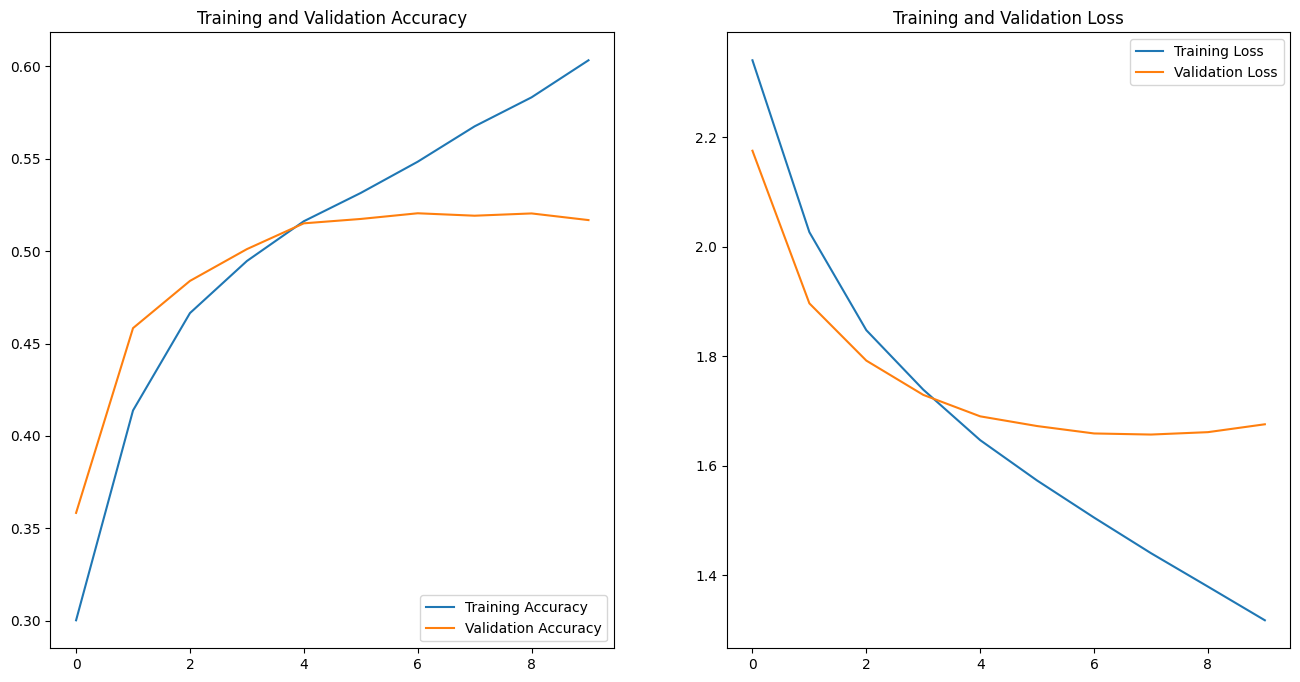

In [ ]:
#CNN - final - 45% - 49.42%-49.42%-54% with early stopping and changed loss function to KLDivergence loss function  and adamax optimizer from adam variation 2
#Variation - 4 Change train validation test split into 70/30 - 53% accuracy and 1.64% loss

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalMaxPooling1D, Conv1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt



# Preprocessing
X = go_emotion_simplified_updated['text'].values
y = go_emotion_simplified_updated['label'].values

# Convert the labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

# Pad the sequences to a fixed length
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)

# Convert the emotion labels to one-hot encoded vectors
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

# Define the model architecture
input_shape = (maxlen,)
input_layer = Input(shape=input_shape)
embedding_layer = Embedding(input_dim=10000, output_dim=100)(input_layer)
conv1d_layer_1 = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
maxpooling1d_layer_1 = GlobalMaxPooling1D()(conv1d_layer_1)
dropout_layer_1 = Dropout(rate=0.2)(maxpooling1d_layer_1)
dense_layer_1 = Dense(units=64, activation='relu')(dropout_layer_1)
dropout_layer_2 = Dropout(rate=0.2)(dense_layer_1)
output_layer = Dense(units=num_classes, activation='softmax')(dropout_layer_2)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adamax', loss='kullback_leibler_divergence', metrics=['accuracy'])

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)


# Train the model
batch_size = 64
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks=[early_stop] )


# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)



# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Calculate the evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()










# Some Hyper Parameter Tuning for accuracy

Epoch 1/10
344/344 [==============================] - 18s 48ms/step - loss: 2.3261 - accuracy: 0.3057 - val_loss: 2.1004 - val_accuracy: 0.3794
Epoch 2/10
344/344 [==============================] - 5s 13ms/step - loss: 1.9468 - accuracy: 0.4361 - val_loss: 1.7830 - val_accuracy: 0.4717
Epoch 3/10
344/344 [==============================] - 3s 8ms/step - loss: 1.7749 - accuracy: 0.4836 - val_loss: 1.6846 - val_accuracy: 0.5049
Epoch 4/10
344/344 [==============================] - 4s 12ms/step - loss: 1.6748 - accuracy: 0.5089 - val_loss: 1.6158 - val_accuracy: 0.5192
Epoch 5/10
344/344 [==============================] - 3s 9ms/step - loss: 1.5979 - accuracy: 0.5298 - val_loss: 1.5712 - val_accuracy: 0.5360
Epoch 6/10
344/344 [==============================] - 2s 6ms/step - loss: 1.5379 - accuracy: 0.5440 - val_loss: 1.5458 - val_accuracy: 0.5414
Epoch 7/10
344/344 [==============================] - 2s 7ms/step - loss: 1.4859 - accuracy: 0.5532 - val_loss: 1.5346 - val_accuracy: 0.5455
Ep

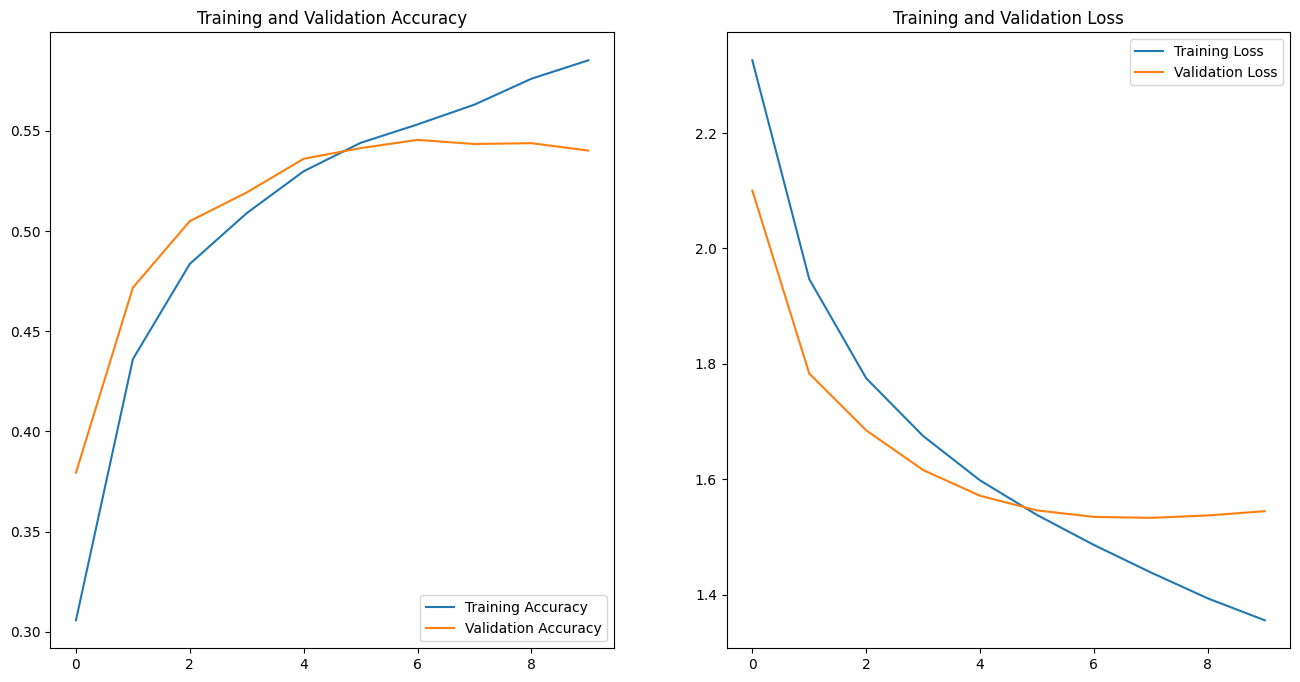

In [ ]:
#CNN - final - 45% - 49.42-49.42-54 with early stopping and changed loss function to KLDivergence loss function  and adamax optimizer from adam variation 2
#batch size - 128 and train val test split -0.1
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalMaxPooling1D, Conv1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, f1_score
import matplotlib.pyplot as plt



# Preprocessing
X = go_emotion_simplified_updated['text'].values
y = go_emotion_simplified_updated['label'].values

# Convert the labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

# Pad the sequences to a fixed length
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)

# Convert the emotion labels to one-hot encoded vectors
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

# Define the model architecture
input_shape = (maxlen,)
input_layer = Input(shape=input_shape)
embedding_layer = Embedding(input_dim=10000, output_dim=100)(input_layer)
conv1d_layer_1 = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
maxpooling1d_layer_1 = GlobalMaxPooling1D()(conv1d_layer_1)
dropout_layer_1 = Dropout(rate=0.2)(maxpooling1d_layer_1)
dense_layer_1 = Dense(units=64, activation='relu')(dropout_layer_1)
dropout_layer_2 = Dropout(rate=0.2)(dense_layer_1)
output_layer = Dense(units=num_classes, activation='softmax')(dropout_layer_2)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adamax', loss='kullback_leibler_divergence', metrics=['accuracy'])

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)


# Train the model
batch_size = 128
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks=[early_stop] )


# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)



# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Calculate the evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()










### LSTM - Variation 1

Epoch 1/10
1357/1357 [==============================] - 49s 29ms/step - loss: 1.8795 - accuracy: 0.4487 - val_loss: 1.6498 - val_accuracy: 0.5200
Epoch 2/10
1357/1357 [==============================] - 18s 13ms/step - loss: 1.4457 - accuracy: 0.5645 - val_loss: 1.5973 - val_accuracy: 0.5295
Epoch 3/10
1357/1357 [==============================] - 18s 13ms/step - loss: 1.1836 - accuracy: 0.6412 - val_loss: 1.7113 - val_accuracy: 0.5030
Epoch 4/10
1357/1357 [==============================] - 16s 12ms/step - loss: 0.9702 - accuracy: 0.7064 - val_loss: 1.8579 - val_accuracy: 0.4870
Epoch 5/10
1357/1357 [==============================] - 16s 12ms/step - loss: 0.8108 - accuracy: 0.7533 - val_loss: 2.0510 - val_accuracy: 0.4699
Epoch 6/10
1357/1357 [==============================] - 17s 12ms/step - loss: 0.6921 - accuracy: 0.7869 - val_loss: 2.2832 - val_accuracy: 0.4602
Epoch 7/10
1357/1357 [==============================] - 17s 12ms/step - loss: 0.6032 - accuracy: 0.8157 - val_loss: 2.4414 -

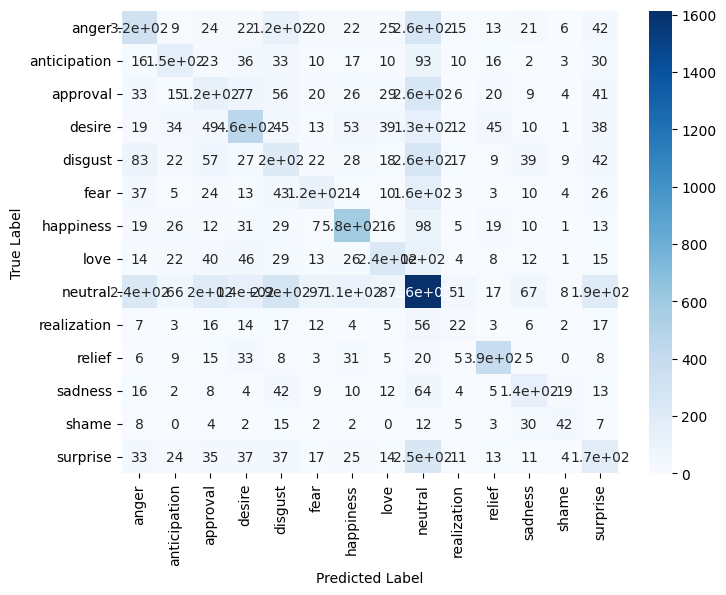

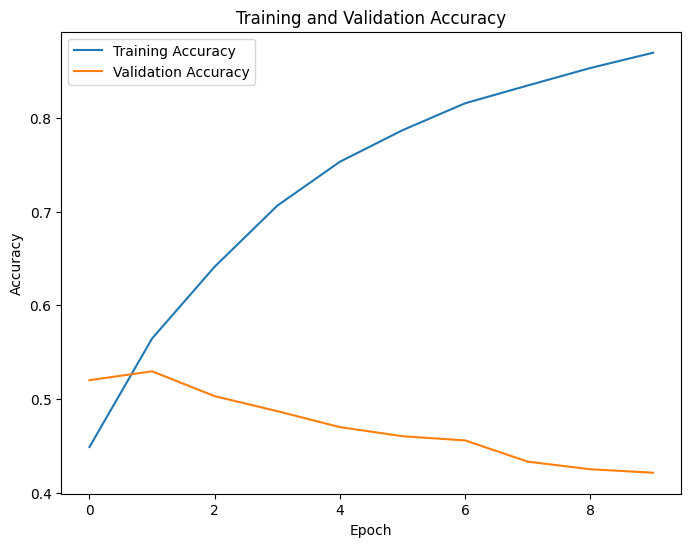

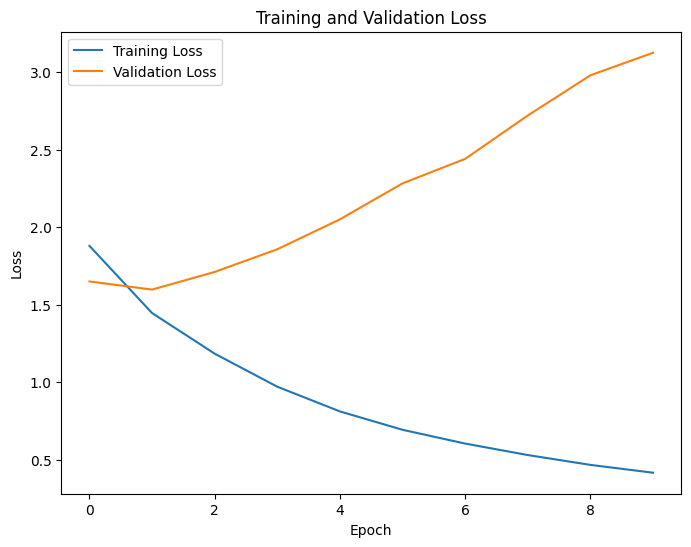

In [ ]:
#LSTM - accuracy 42%
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix



# Filter the data to include only the relevant columns and labels
go_emotion_simplified_updated = go_emotion_simplified_updated[['text', 'label']]


# Split the data into train and test sets
train_data, test_data = train_test_split(go_emotion_simplified_updated, test_size=0.2, random_state=42)

# Encode the labels using LabelEncoder
le = LabelEncoder()
le.fit(train_data['label'])

# Tokenize the text data and pad the sequences to a fixed length
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['text'])

max_sequence_length = 100

train_sequences = tokenizer.texts_to_sequences(train_data['text'])
train_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length)

test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length)




# Create the model
embedding_size = 100

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_size, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=len(le.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
batch_size = 32

history = model.fit(train_sequences, to_categorical(le.transform(train_data['label'])), epochs=epochs, batch_size=batch_size, validation_data=(test_sequences, to_categorical(le.transform(test_data['label']))))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_sequences, to_categorical(le.transform(test_data['label'])))
print('Test accuracy:', test_acc)
print("Test loss:", test_loss)


# Make predictions on the test data
y_true = le.transform(test_data['label'])
y_pred = model.predict(test_sequences).argmax(axis=-1)
#y_pred = model.predict_classes(test_sequences)

# Print the classification report and confusion matrix
print(classification_report(y_true, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the training and validation accuracy and loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## LSTM - Variation 2 - One Hot Encoding Used

Epoch 1/10
1357/1357 [==============================] - 37s 24ms/step - loss: 1.8497 - accuracy: 0.4552 - val_loss: 1.6438 - val_accuracy: 0.5218
Epoch 2/10
1357/1357 [==============================] - 18s 14ms/step - loss: 1.4460 - accuracy: 0.5628 - val_loss: 1.6044 - val_accuracy: 0.5310
Epoch 3/10
1357/1357 [==============================] - 17s 12ms/step - loss: 1.1791 - accuracy: 0.6410 - val_loss: 1.6967 - val_accuracy: 0.4988
Epoch 4/10
1357/1357 [==============================] - 16s 12ms/step - loss: 0.9497 - accuracy: 0.7105 - val_loss: 1.8361 - val_accuracy: 0.4781
Epoch 5/10
1357/1357 [==============================] - 18s 13ms/step - loss: 0.7811 - accuracy: 0.7590 - val_loss: 2.0090 - val_accuracy: 0.4565
Epoch 6/10
1357/1357 [==============================] - 16s 12ms/step - loss: 0.6605 - accuracy: 0.7936 - val_loss: 2.2807 - val_accuracy: 0.4615
Epoch 7/10
1357/1357 [==============================] - 16s 12ms/step - loss: 0.5759 - accuracy: 0.8197 - val_loss: 2.5753 -

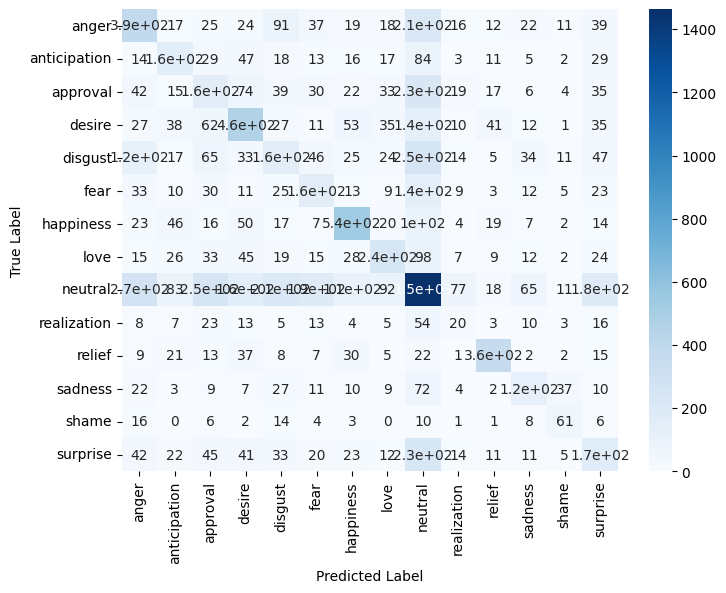

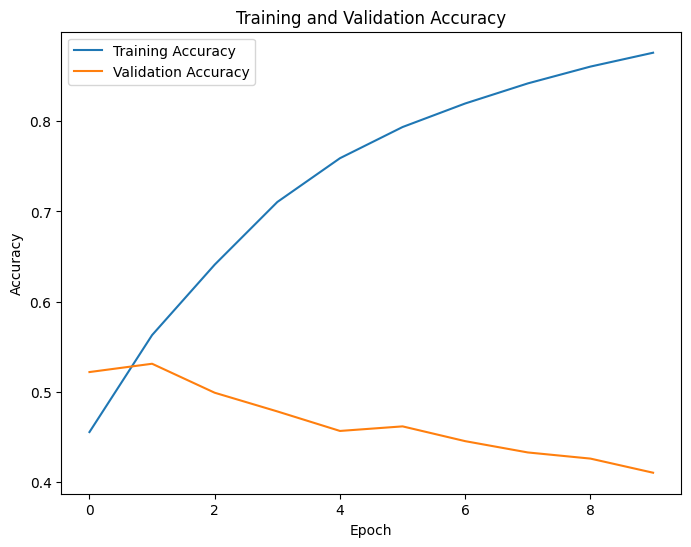

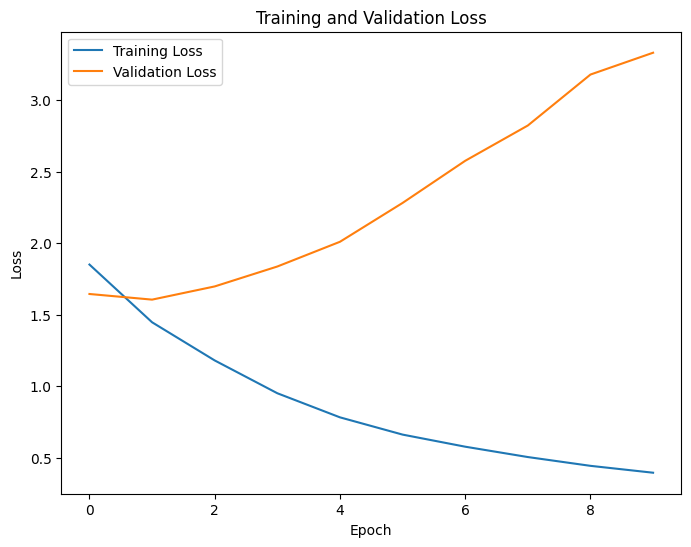

In [ ]:
#LSTM - accuracy 42% - one hot encoding used - variation 1 LSTM in datapreprocessing - 41% after variation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical

# Filter the data to include only the relevant columns and labels
go_emotion_simplified_updated = go_emotion_simplified_updated[['text', 'label']]

# Split the data into train and test sets
train_data, test_data = train_test_split(go_emotion_simplified_updated, test_size=0.2, random_state=42)

# Encode the labels using LabelEncoder
le = LabelEncoder()
le.fit(train_data['label'])

# Tokenize the text data and pad the sequences to a fixed length
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['text'])

max_sequence_length = 100

train_sequences = tokenizer.texts_to_sequences(train_data['text'])
train_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length)

test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Encode the labels using LabelEncoder
train_labels = le.transform(train_data['label'])
test_labels = le.transform(test_data['label'])

# Convert the labels to one-hot encoded vectors
num_classes = len(set(train_data['label']))
train_labels = to_categorical(train_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)



# Create the model
embedding_size = 100

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_size, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=len(le.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
batch_size = 32

history = model.fit(train_sequences, to_categorical(le.transform(train_data['label'])), epochs=epochs, batch_size=batch_size, validation_data=(test_sequences, to_categorical(le.transform(test_data['label']))))



# Evaluate the model
test_loss, test_acc = model.evaluate(test_sequences, to_categorical(le.transform(test_data['label'])))
print('Test accuracy:', test_acc)

print("Test loss:", test_loss)


# Make predictions on the test data
y_true = le.transform(test_data['label'])
y_pred = model.predict(test_sequences).argmax(axis=-1)
#y_pred = model.predict_classes(test_sequences)

# Print the classification report and confusion matrix
print(classification_report(y_true, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the training and validation accuracy and loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# LSTM - Variation -3 - 70/30 Train test split from 80/20 - 42% accuracy, 3.28% loss

Epoch 1/10
1187/1187 [==============================] - 42s 32ms/step - loss: 1.8573 - accuracy: 0.4529 - val_loss: 1.6168 - val_accuracy: 0.5226
Epoch 2/10
1187/1187 [==============================] - 15s 13ms/step - loss: 1.4017 - accuracy: 0.5719 - val_loss: 1.6130 - val_accuracy: 0.5231
Epoch 3/10
1187/1187 [==============================] - 15s 13ms/step - loss: 1.1141 - accuracy: 0.6576 - val_loss: 1.7432 - val_accuracy: 0.4973
Epoch 4/10
1187/1187 [==============================] - 16s 13ms/step - loss: 0.8911 - accuracy: 0.7262 - val_loss: 1.8881 - val_accuracy: 0.4692
Epoch 5/10
1187/1187 [==============================] - 17s 14ms/step - loss: 0.7323 - accuracy: 0.7747 - val_loss: 2.1296 - val_accuracy: 0.4565
Epoch 6/10
1187/1187 [==============================] - 14s 12ms/step - loss: 0.6208 - accuracy: 0.8061 - val_loss: 2.3376 - val_accuracy: 0.4416
Epoch 7/10
1187/1187 [==============================] - 14s 12ms/step - loss: 0.5379 - accuracy: 0.8331 - val_loss: 2.6035 -

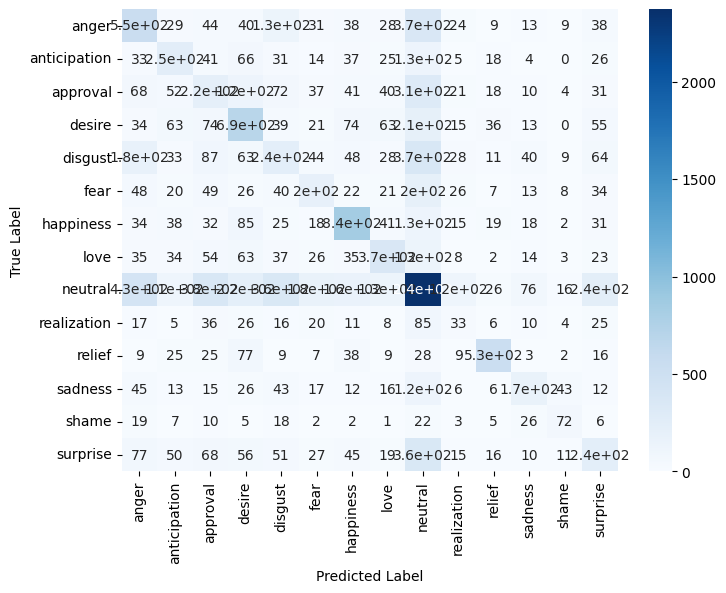

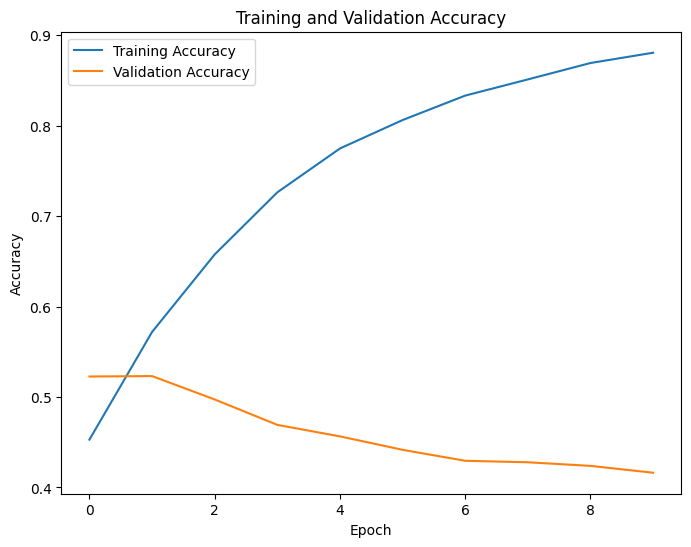

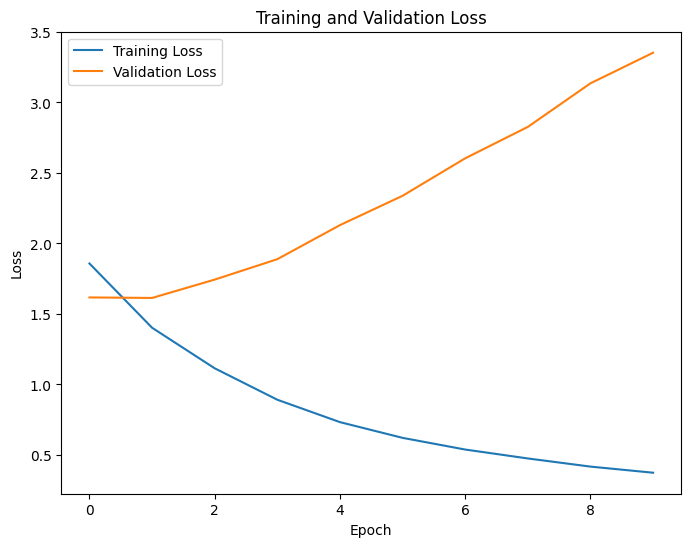

In [ ]:
#LSTM - accuracy 43% - change label encoding to one hot encoding - variation 2 LSTM in datapreprocessing - 43% after variation
#Variation 3 - 70/30 Train test split from 80/20 - 42% accuracy, 3.28% loss
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical

# Filter the data to include only the relevant columns and labels
go_emotion_simplified_updated = go_emotion_simplified_updated[['text', 'label']]

# Split the data into train and test sets
train_data, test_data = train_test_split(go_emotion_simplified_updated, test_size=0.3, random_state=42)

# Encode the labels using LabelEncoder
le = LabelEncoder()
le.fit(train_data['label'])

# Tokenize the text data and pad the sequences to a fixed length
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['text'])

max_sequence_length = 100

train_sequences = tokenizer.texts_to_sequences(train_data['text'])
train_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length)

test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Encode the labels using LabelEncoder
train_labels = le.transform(train_data['label'])
test_labels = le.transform(test_data['label'])

# Convert the labels to one-hot encoded vectors
num_classes = len(set(train_data['label']))
train_labels = to_categorical(train_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)



# Create the model
embedding_size = 100

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_size, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=len(le.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
batch_size = 32

history = model.fit(train_sequences, to_categorical(le.transform(train_data['label'])), epochs=epochs, batch_size=batch_size, validation_data=(test_sequences, to_categorical(le.transform(test_data['label']))))



# Evaluate the model
test_loss, test_acc = model.evaluate(test_sequences, to_categorical(le.transform(test_data['label'])))
print('Test accuracy:', test_acc)

print("Test loss:", test_loss)


# Make predictions on the test data
y_true = le.transform(test_data['label'])
y_pred = model.predict(test_sequences).argmax(axis=-1)
#y_pred = model.predict_classes(test_sequences)

# Print the classification report and confusion matrix
print(classification_report(y_true, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the training and validation accuracy and loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## LSTM Variation - 4 - #Optimizer - Adamax and Loss frunction KL Divergence Loss function

Epoch 1/10
1357/1357 [==============================] - 41s 27ms/step - loss: 2.1849 - accuracy: 0.3390 - val_loss: 1.9759 - val_accuracy: 0.3983
Epoch 2/10
1357/1357 [==============================] - 26s 20ms/step - loss: 1.8623 - accuracy: 0.4455 - val_loss: 1.8354 - val_accuracy: 0.4558
Epoch 3/10
1357/1357 [==============================] - 17s 13ms/step - loss: 1.7304 - accuracy: 0.4829 - val_loss: 1.7750 - val_accuracy: 0.4825
Epoch 4/10
1357/1357 [==============================] - 17s 13ms/step - loss: 1.6398 - accuracy: 0.5109 - val_loss: 1.7535 - val_accuracy: 0.4901
Epoch 5/10
1357/1357 [==============================] - 16s 12ms/step - loss: 1.5661 - accuracy: 0.5331 - val_loss: 1.7263 - val_accuracy: 0.5076
Epoch 6/10
1357/1357 [==============================] - 18s 14ms/step - loss: 1.4911 - accuracy: 0.5546 - val_loss: 1.7130 - val_accuracy: 0.5073
Epoch 7/10
1357/1357 [==============================] - 17s 12ms/step - loss: 1.4170 - accuracy: 0.5743 - val_loss: 1.7037 -

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


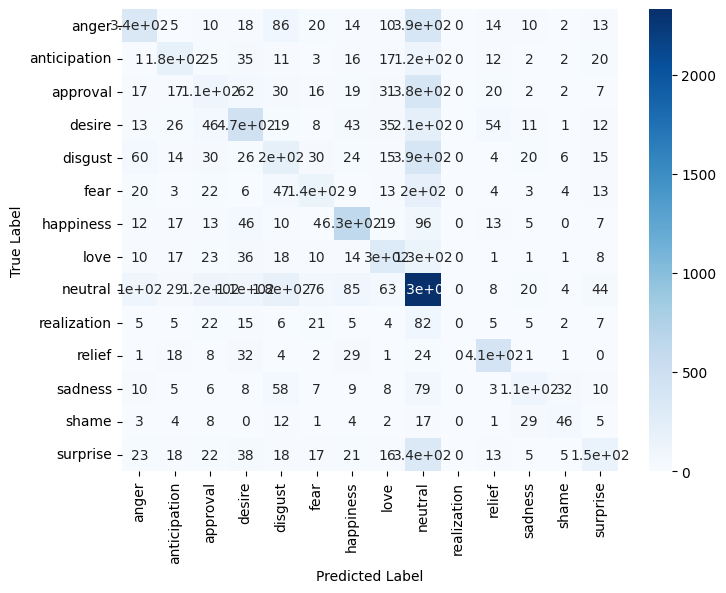

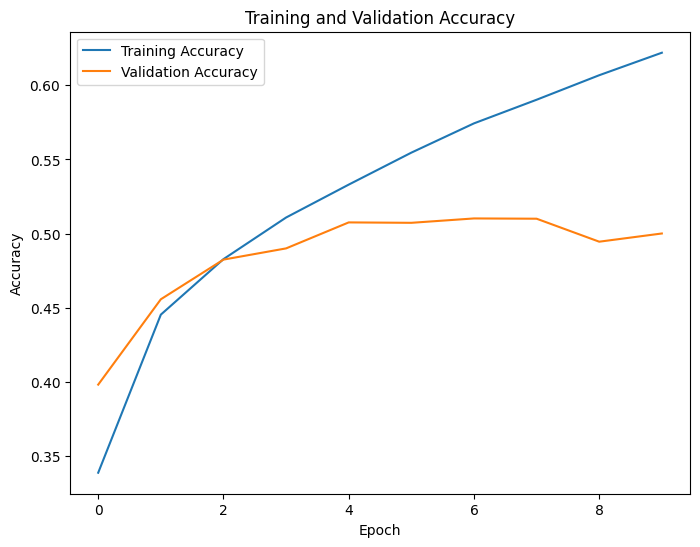

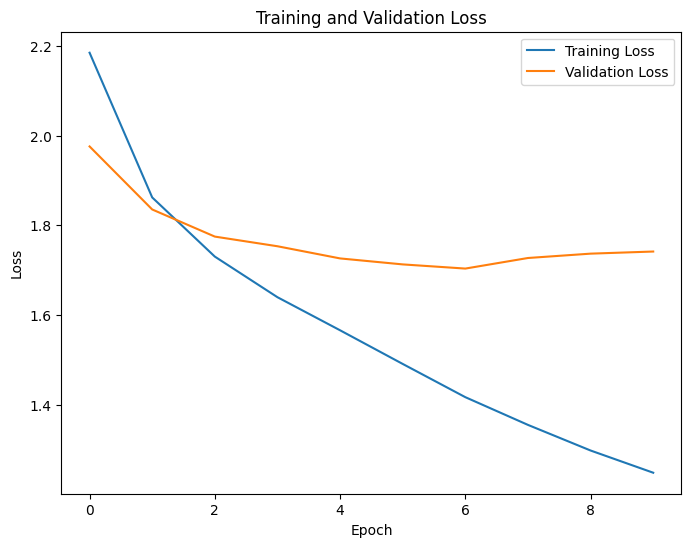

In [ ]:
#LSTM - accuracy 43% - change label encoding to one hot encoding - variation 1 LSTM in datapreprocessing - 43% after variation
#Optimizer - Adamax and Loss frunction KL Divergence Loss function

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt


import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical

# Filter the data to include only the relevant columns and labels
go_emotion_simplified_updated = go_emotion_simplified_updated[['text', 'label']]

# Split the data into train and test sets
train_data, test_data = train_test_split(go_emotion_simplified_updated, test_size=0.2, random_state=42)

# Encode the labels using LabelEncoder
le = LabelEncoder()
le.fit(train_data['label'])

# Tokenize the text data and pad the sequences to a fixed length
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['text'])

max_sequence_length = 100

train_sequences = tokenizer.texts_to_sequences(train_data['text'])
train_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length)

test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Encode the labels using LabelEncoder
train_labels = le.transform(train_data['label'])
test_labels = le.transform(test_data['label'])

# Convert the labels to one-hot encoded vectors
num_classes = len(set(train_data['label']))
train_labels = to_categorical(train_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)





# Create the model
embedding_size = 100

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_size, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=len(le.classes_), activation='softmax'))

model.compile(optimizer='adamax', loss='kullback_leibler_divergence', metrics=['accuracy'])

# Train the model
epochs = 10
batch_size = 32

history = model.fit(train_sequences,
                    to_categorical(le.transform(train_data['label'])),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(test_sequences, to_categorical(le.transform(test_data['label']))))




# Evaluate the model
test_loss, test_acc = model.evaluate(test_sequences, to_categorical(le.transform(test_data['label'])))
print('Test accuracy:', test_acc)

print("Test loss:", test_loss)


# Make predictions on the test data
y_true = le.transform(test_data['label'])
y_pred = model.predict(test_sequences).argmax(axis=-1)
#y_pred = model.predict_classes(test_sequences)

from sklearn.metrics import precision_recall_fscore_support

# y_true is the true labels and y_pred is the predicted labels
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, zero_division=1)

# print the precision, recall, and F-score for each class
for i in range(num_classes):
    print(f"Class {i}: precision={precision[i]}, recall={recall[i]}, F-score={fscore[i]}")

# Print the classification report and confusion matrix
print(classification_report(y_true, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the training and validation accuracy and loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/10
1527/1527 [==============================] - 45s 25ms/step - loss: 2.1706 - accuracy: 0.3425 - val_loss: 1.9515 - val_accuracy: 0.4310
Epoch 2/10
1527/1527 [==============================] - 19s 12ms/step - loss: 1.8444 - accuracy: 0.4506 - val_loss: 1.8036 - val_accuracy: 0.4760
Epoch 3/10
1527/1527 [==============================] - 19s 12ms/step - loss: 1.7019 - accuracy: 0.4935 - val_loss: 1.7355 - val_accuracy: 0.4982
Epoch 4/10
1527/1527 [==============================] - 19s 13ms/step - loss: 1.6063 - accuracy: 0.5184 - val_loss: 1.7047 - val_accuracy: 0.4999
Epoch 5/10
1527/1527 [==============================] - 18s 12ms/step - loss: 1.5329 - accuracy: 0.5411 - val_loss: 1.6784 - val_accuracy: 0.5193
Epoch 6/10
1527/1527 [==============================] - 17s 11ms/step - loss: 1.4661 - accuracy: 0.5618 - val_loss: 1.6779 - val_accuracy: 0.5159
Epoch 7/10
1527/1527 [==============================] - 18s 12ms/step - loss: 1.4101 - accuracy: 0.5751 - val_loss: 1.6730 -

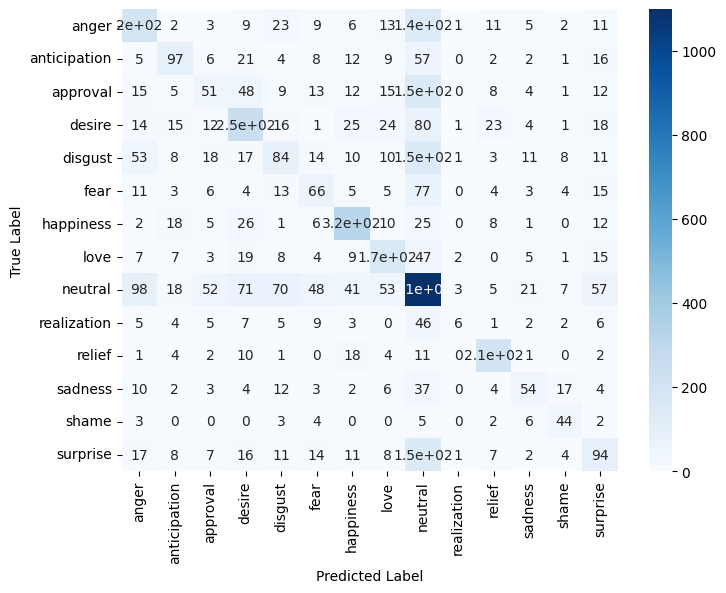

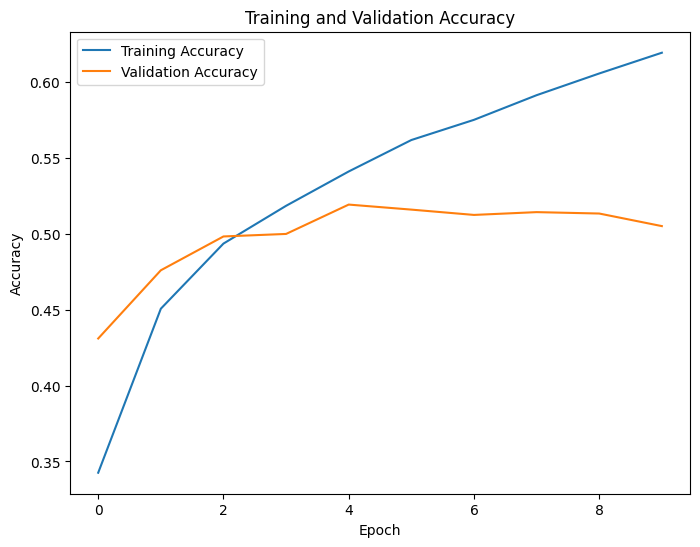

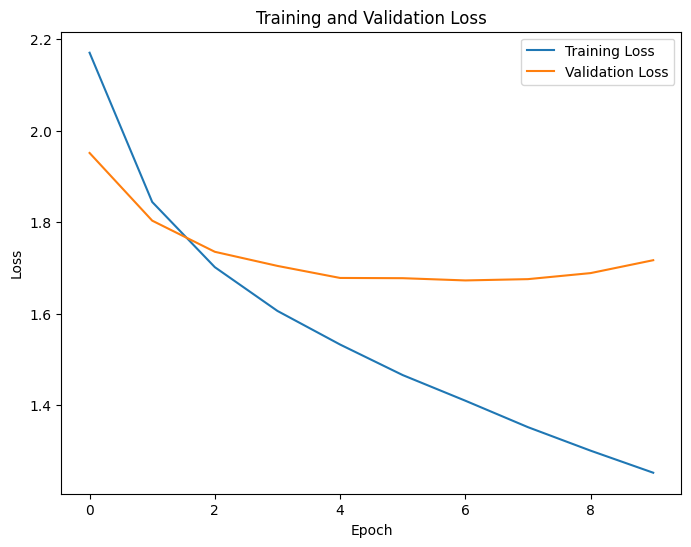

In [ ]:
#LSTM - accuracy 43% - change label encoding to one hot encoding - variation 1 LSTM in datapreprocessing - 43% after variation
#Optimizer - Adamax and Loss frunction KL Divergence Loss function
Test size - 0.1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt


import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical

# Filter the data to include only the relevant columns and labels
go_emotion_simplified_updated = go_emotion_simplified_updated[['text', 'label']]

# Split the data into train and test sets
train_data, test_data = train_test_split(go_emotion_simplified_updated, test_size=0.1, random_state=42)

# Encode the labels using LabelEncoder
le = LabelEncoder()
le.fit(train_data['label'])

# Tokenize the text data and pad the sequences to a fixed length
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['text'])

max_sequence_length = 100

train_sequences = tokenizer.texts_to_sequences(train_data['text'])
train_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length)

test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Encode the labels using LabelEncoder
train_labels = le.transform(train_data['label'])
test_labels = le.transform(test_data['label'])

# Convert the labels to one-hot encoded vectors
num_classes = len(set(train_data['label']))
train_labels = to_categorical(train_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)





# Create the model
embedding_size = 100

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_size, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=len(le.classes_), activation='softmax'))

model.compile(optimizer='adamax', loss='kullback_leibler_divergence', metrics=['accuracy'])

# Train the model
epochs = 10
batch_size = 32

history = model.fit(train_sequences,
                    to_categorical(le.transform(train_data['label'])),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(test_sequences, to_categorical(le.transform(test_data['label']))))




# Evaluate the model
test_loss, test_acc = model.evaluate(test_sequences, to_categorical(le.transform(test_data['label'])))
print('Test accuracy:', test_acc)

print("Test loss:", test_loss)


# Make predictions on the test data
y_true = le.transform(test_data['label'])
y_pred = model.predict(test_sequences).argmax(axis=-1)
#y_pred = model.predict_classes(test_sequences)

from sklearn.metrics import precision_recall_fscore_support

# y_true is the true labels and y_pred is the predicted labels
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, zero_division=1)

# print the precision, recall, and F-score for each class
for i in range(num_classes):
    print(f"Class {i}: precision={precision[i]}, recall={recall[i]}, F-score={fscore[i]}")

# Print the classification report and confusion matrix
print(classification_report(y_true, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the training and validation accuracy and loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/10
382/382 [==============================] - 31s 70ms/step - loss: 2.3204 - accuracy: 0.3030 - val_loss: 2.1372 - val_accuracy: 0.3488
Epoch 2/10
382/382 [==============================] - 9s 25ms/step - loss: 2.0226 - accuracy: 0.3808 - val_loss: 1.9326 - val_accuracy: 0.4303
Epoch 3/10
382/382 [==============================] - 6s 16ms/step - loss: 1.8311 - accuracy: 0.4636 - val_loss: 1.8216 - val_accuracy: 0.4717
Epoch 4/10
382/382 [==============================] - 7s 18ms/step - loss: 1.7231 - accuracy: 0.4868 - val_loss: 1.7724 - val_accuracy: 0.4796
Epoch 5/10
382/382 [==============================] - 6s 15ms/step - loss: 1.6432 - accuracy: 0.5036 - val_loss: 1.7370 - val_accuracy: 0.4944
Epoch 6/10
382/382 [==============================] - 8s 21ms/step - loss: 1.5706 - accuracy: 0.5272 - val_loss: 1.7306 - val_accuracy: 0.5067
Epoch 7/10
382/382 [==============================] - 5s 13ms/step - loss: 1.5096 - accuracy: 0.5447 - val_loss: 1.7089 - val_accuracy: 0.507

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


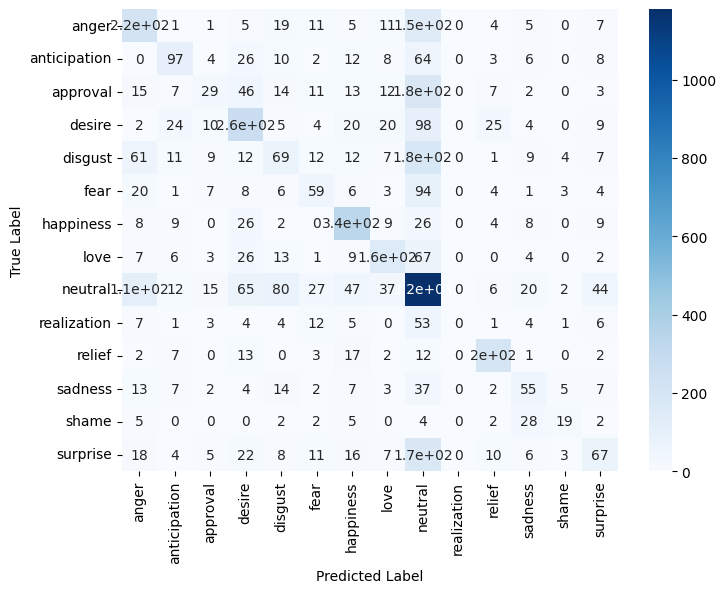

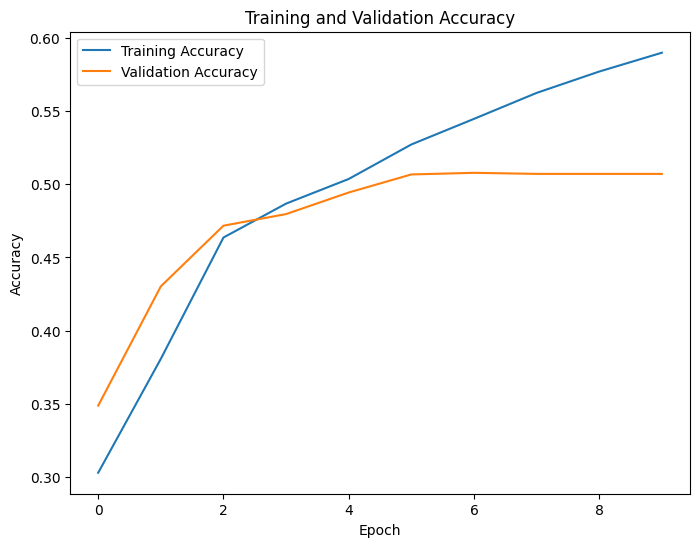

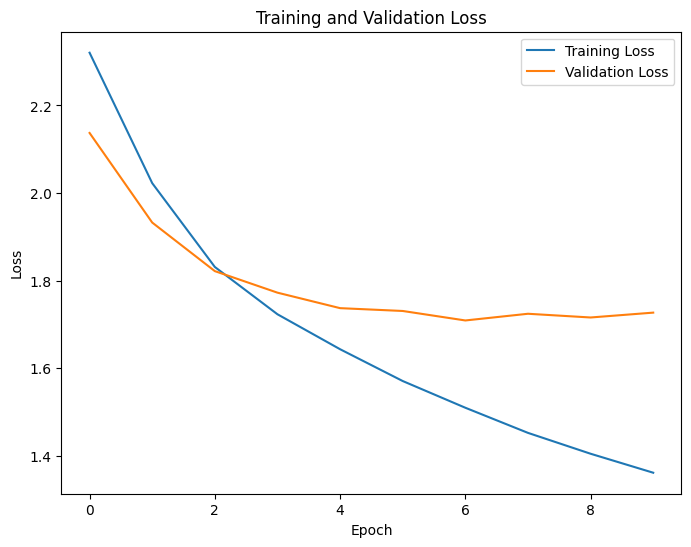

In [ ]:
#LSTM - accuracy 43% - change label encoding to one hot encoding - variation 1 LSTM in datapreprocessing - 43% after variation
#Optimizer - Adamax and Loss frunction KL Divergence Loss function
#test size - 0.1
#Batch size - 128

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt


import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical

# Filter the data to include only the relevant columns and labels
go_emotion_simplified_updated = go_emotion_simplified_updated[['text', 'label']]

# Split the data into train and test sets
train_data, test_data = train_test_split(go_emotion_simplified_updated, test_size=0.1, random_state=42)

# Encode the labels using LabelEncoder
le = LabelEncoder()
le.fit(train_data['label'])

# Tokenize the text data and pad the sequences to a fixed length
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['text'])

max_sequence_length = 100

train_sequences = tokenizer.texts_to_sequences(train_data['text'])
train_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length)

test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Encode the labels using LabelEncoder
train_labels = le.transform(train_data['label'])
test_labels = le.transform(test_data['label'])

# Convert the labels to one-hot encoded vectors
num_classes = len(set(train_data['label']))
train_labels = to_categorical(train_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)





# Create the model
embedding_size = 100

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_size, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=len(le.classes_), activation='softmax'))

model.compile(optimizer='adamax', loss='kullback_leibler_divergence', metrics=['accuracy'])

# Train the model
epochs = 10
batch_size = 128

history = model.fit(train_sequences,
                    to_categorical(le.transform(train_data['label'])),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(test_sequences, to_categorical(le.transform(test_data['label']))))




# Evaluate the model
test_loss, test_acc = model.evaluate(test_sequences, to_categorical(le.transform(test_data['label'])))
print('Test accuracy:', test_acc)

print("Test loss:", test_loss)


# Make predictions on the test data
y_true = le.transform(test_data['label'])
y_pred = model.predict(test_sequences).argmax(axis=-1)
#y_pred = model.predict_classes(test_sequences)

from sklearn.metrics import precision_recall_fscore_support

# y_true is the true labels and y_pred is the predicted labels
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, zero_division=1)

# print the precision, recall, and F-score for each class
for i in range(num_classes):
    print(f"Class {i}: precision={precision[i]}, recall={recall[i]}, F-score={fscore[i]}")

# Print the classification report and confusion matrix
print(classification_report(y_true, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the training and validation accuracy and loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## **SVM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score


vectorizer = CountVectorizer(stop_words='english')





# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(go_emotion_simplified_all['text'], go_emotion_simplified_all['label'], test_size=0.2, random_state=42)

# Vectorize the text data using the CountVectorizer
stop_words = {'a', 'an', 'the', ...}  # Set of stop words
stop_words_list = list(stop_words)   # Convert set to list
vectorizer = CountVectorizer(stop_words=stop_words_list)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the SVM model
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.5041002487791394
